# Data Exploration

Hey! During this first step, please, take a look at the data set and just explore it, find the types of each column and try to find interesting things. Don't worry about data cleaning. Just exploration for now.  
You can answer the following questions:
- How many columns there are
- The type of each column
- The different values that a column can take
- Which do you think are the most important columns? If we are looking at the overall score.

Go wild! (Remember, so far, only exploration).


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('Paired')
pal=sns.color_palette(n_colors=12)

In [2]:
df = pd.read_csv('Saber_11__2019-2.csv')
# CSV file found in the link https://www.datos.gov.co/Educaci-n/PUNTAJE-ICFES-POR-DEPARTAMENTOS/x9vi-iv8c
# or copy this link in the function https://www.datos.gov.co/api/views/ynam-yc42/rows.csv?accessType=DOWNLOAD
df.head()

C:\Users\jsarmiento\AppData\Local\Temp\ipykernel_17604\2289223620.py:1: DtypeWarning: Columns (76,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Saber_11__2019-2.csv')


ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO    ESTU_FECHANACIMIENTO  \
0                 TI          COLOMBIA           M  02/18/2002 12:00:00 AM   
1                 TI          COLOMBIA           M  06/28/2003 12:00:00 AM   
2                 TI          COLOMBIA           M  06/02/2001 12:00:00 AM   
3                 TI          COLOMBIA           M  04/26/2002 12:00:00 AM   
4                 TI          COLOMBIA           M  02/05/2002 12:00:00 AM   

   PERIODO  ESTU_CONSECUTIVO ESTU_ESTUDIANTE ESTU_TIENEETNIA ESTU_PAIS_RESIDE  \
0    20194  SB11201940031558      ESTUDIANTE              No         COLOMBIA   
1    20194  SB11201940303339      ESTUDIANTE              No         COLOMBIA   
2    20194  SB11201940255017      ESTUDIANTE              No         COLOMBIA   
3    20194  SB11201940154799      ESTUDIANTE              Si         COLOMBIA   
4    20194  SB11201940280831      ESTUDIANTE              No         COLOMBIA   

  ESTU_ETNIA  ... PUNT_INGLES PERCENTIL_INGLES DESEMP_INGLES PUNT_GLOBAL  \
0          -  ...        54.0               67            A1         208   
1          -  ...        63.0               88            A2         299   
2          -  ...        64.0               89            A2         299   
3    Ninguno  ...        53.0               67            A1         309   
4          -  ...        52.0               63            A1         288   

  PERCENTIL_GLOBAL ESTU_INSE_INDIVIDUAL ESTU_NSE_INDIVIDUAL  \
0               25     50.9421557404314                 2.0   
1               83      59.767864431576                 3.0   
2               84     50.7642383644749                 2.0   
3               88     45.7791353123516                 2.0   
4               78     52.9109464277177                 3.0   

  ESTU_NSE_ESTABLECIMIENTO ESTU_ESTADOINVESTIGACION         ESTU_GENERACION-E  
0                      2.0                 PUBLICAR                        NO  
1                      4.0                 PUBLICAR                        NO  
2                      3.0                 PUBLICAR  GENERACION E - GRATUIDAD  
3                      3.0                 PUBLICAR  GENERACION E - GRATUIDAD  
4                      3.0                 PUBLICAR                        NO  

[5 rows x 82 columns]

df.info to see the type of data in each column and to know if there are missing values in the dataset:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546212 entries, 0 to 546211
Data columns (total 82 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ESTU_TIPODOCUMENTO             546212 non-null  object 
 1   ESTU_NACIONALIDAD              546212 non-null  object 
 2   ESTU_GENERO                    546212 non-null  object 
 3   ESTU_FECHANACIMIENTO           546212 non-null  object 
 4   PERIODO                        546212 non-null  int64  
 5   ESTU_CONSECUTIVO               546212 non-null  object 
 6   ESTU_ESTUDIANTE                546212 non-null  object 
 7   ESTU_TIENEETNIA                546212 non-null  object 
 8   ESTU_PAIS_RESIDE               546212 non-null  object 
 9   ESTU_ETNIA                     546212 non-null  object 
 10  ESTU_DEPTO_RESIDE              545835 non-null  object 
 11  ESTU_COD_RESIDE_DEPTO          546212 non-null  object 
 12  ESTU_MCPIO_RESIDE             

Extract column names in order to review data in the dataset:

In [3]:
col_list=list(df.columns)
len(col_list)

82

In [ ]:
df[col_list[:10]].head()

In [ ]:
df[col_list[10:30]].head()

In [ ]:
df[col_list[30:50]].head()

In [ ]:
df[col_list[50:70]].head()

Unique values on categorical data:

In [27]:
df_copy=df.copy()
df_copy.drop(["PERCENTIL_GLOBAL","ESTU_COD_RESIDE_DEPTO","ESTU_COD_RESIDE_MCPIO"],axis=1,inplace=True)
df_copy=df_copy.select_dtypes(include=['object'])
uniques=df_copy.apply(lambda col: col.unique())
uniques.to_csv("IcfesUniques.csv",sep=",",index=True,header=False)
uniques

ESTU_TIPODOCUMENTO                     [TI, CC, PEP, CE, NES, PE, CR, CCB, PC, RC]
ESTU_NACIONALIDAD                [COLOMBIA, VENEZUELA, ESPAÑA, ECUADOR, CROACIA...
ESTU_GENERO                                                              [M, F, -]
ESTU_CONSECUTIVO                 [SB11201940031558, SB11201940303339, SB1120194...
ESTU_ESTUDIANTE                                                       [ESTUDIANTE]
ESTU_TIENEETNIA                                                        [No, Si, -]
ESTU_PAIS_RESIDE                 [COLOMBIA, VENEZUELA, ESPAÑA, ECUADOR, CROACIA...
ESTU_ETNIA                       [-, Ninguno, Comunidad afrodescendiente, Paez,...
ESTU_DEPTO_RESIDE                [MAGDALENA, BOGOTÁ, BOLIVAR, ATLANTICO, VALLE,...
ESTU_MCPIO_RESIDE                [SANTA ANA, BOGOTÁ D.C., CARTAGENA DE INDIAS, ...
FAMI_ESTRATOVIVIENDA             [Estrato 3, Estrato 1, -, Estrato 4, Estrato 2...
FAMI_PERSONASHOGAR                   [5 a 6, 9 o más, 3 a 4, 7 a 8, -, nan, 1 a 2]
FAMI

Description of numerical data from exam results

In [6]:
df_copy=df.copy()
df_copy["PERCENTIL_GLOBAL"]=pd.to_numeric(df_copy["PERCENTIL_GLOBAL"],errors='coerce')
df_copy[col_list[70:77]].describe().T

count        mean        std  min    25%  \
PERCENTIL_SOCIALES_CIUDADANAS  546212.0   50.179648  28.911682  1.0   25.0   
DESEMP_SOCIALES_CIUDADANAS     546212.0    1.901584   0.820178  1.0    1.0   
PUNT_INGLES                    546193.0   48.416891  12.558438  0.0   39.0   
PERCENTIL_INGLES               546212.0   50.098669  28.917401  1.0   25.0   
PUNT_GLOBAL                    546212.0  246.186464  51.386858  0.0  207.0   
PERCENTIL_GLOBAL               546193.0   49.994324  28.976534  1.0   25.0   

                                 50%    75%    max  
PERCENTIL_SOCIALES_CIUDADANAS   50.0   75.0  100.0  
DESEMP_SOCIALES_CIUDADANAS       2.0    2.0    4.0  
PUNT_INGLES                     48.0   56.0  100.0  
PERCENTIL_INGLES                50.0   75.0  100.0  
PUNT_GLOBAL                    243.0  282.0  477.0  
PERCENTIL_GLOBAL                50.0   75.0  100.0

Viewing the correlation between variables:

(From the dataset info, the columns that are not a code for a school or department, but that are clearly a number variable are columns with index 60 to 76)

C:\Users\jsarmiento\AppData\Local\Temp\ipykernel_22328\3831943817.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_copy[col_list[60:77]].corr(),vmin=-1,vmax=1)


<Axes: >

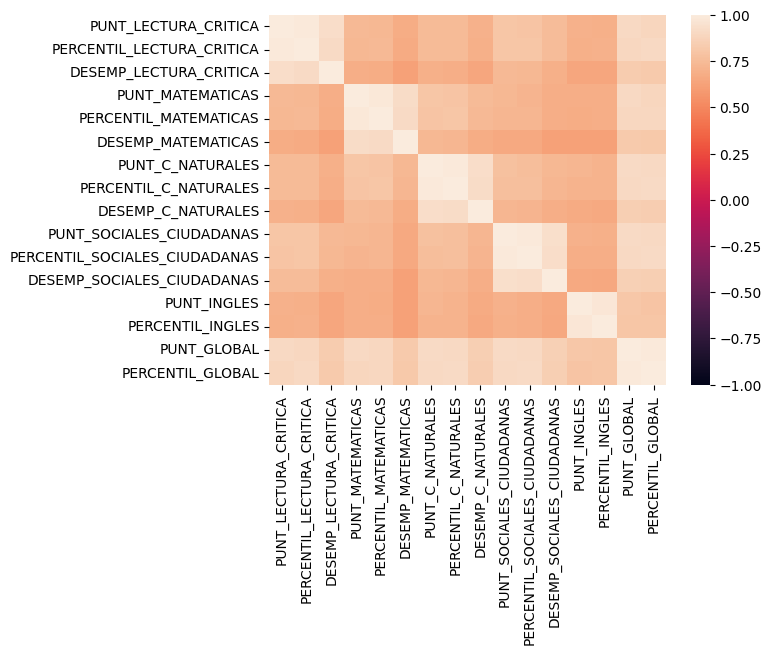

In [7]:
df_copy=df.copy()
df_copy["PERCENTIL_GLOBAL"]=pd.to_numeric(df_copy["PERCENTIL_GLOBAL"],errors='coerce')
len(col_list[60:75])
sns.heatmap(df_copy[col_list[60:77]].corr(),vmin=-1,vmax=1)


As expected, columns PUNT_GLOBAL and PERCENTIL_GLOBAL are highly correlated to all other columns due to the fact that it is a linear combination of the other columns. Additionally, between each three variables of a section of the icfes, they have a high correlation value.

On the other side, values between the variables of the different icfes sections (ie. MATEMATICAS and INGLES) have a certain correlation but its not a high value of it.

Info about scores:

By student's residency: Does the place they live in affect the score? A later question can be correlating with economic class (estrato)

In [8]:
df_copy=df.copy()
list_punt=["PUNT_LECTURA_CRITICA","PUNT_MATEMATICAS","PUNT_C_NATURALES", "PUNT_SOCIALES_CIUDADANAS","PUNT_INGLES","PUNT_GLOBAL"]
df_copy=df_copy[list_punt+["ESTU_DEPTO_RESIDE","COLE_DEPTO_UBICACION","ESTU_NACIONALIDAD"]]
# df_copy=df_copy[["PUNT_GLOBAL","PERCENTIL_GLOBAL","ESTU_DEPTO_RESIDE","COLE_DEPTO_UBICACION","ESTU_NACIONALIDAD"]]
# df_copy=df_copy.set_index(["ESTU_DEPTO_RESIDE","COLE_DEPTO_UBICACION","ESTU_NACIONALIDAD"])
# index=df_copy.index
#df_copy["PERCENTIL_GLOBAL"]=pd.to_numeric(df_copy["PERCENTIL_GLOBAL"],errors='coerce')
df_copy.groupby(["ESTU_DEPTO_RESIDE"],dropna=False).agg([np.mean,np.std,np.max,np.min]).sort_values([("PUNT_GLOBAL","mean")],ascending=False)

C:\Users\jsarmiento\AppData\Local\Temp\ipykernel_22328\2597742920.py:8: FutureWarning: ['COLE_DEPTO_UBICACION', 'ESTU_NACIONALIDAD'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_copy.groupby(["ESTU_DEPTO_RESIDE"],dropna=False).agg([np.mean,np.std,np.max,np.min]).sort_values([("PUNT_GLOBAL","mean")],ascending=False)


PUNT_LECTURA_CRITICA                      PUNT_MATEMATICAS  \
                                  mean        std amax amin             mean   
ESTU_DEPTO_RESIDE                                                              
BOGOTÁ                       55.686627   9.734576  100    0        54.745108   
SANTANDER                    55.151337  10.441471  100    0        55.152632   
BOYACA                       54.127006   9.820573  100   22        55.078029   
NORTE SANTANDER              53.455162  10.178910  100    0        53.528031   
CUNDINAMARCA                 53.344154   9.828787  100    0        52.425296   
QUINDIO                      53.171451  10.381989  100    0        51.790640   
NaN                          52.599469  10.257913   78   25        52.039788   
RISARALDA                    52.971495  10.125128  100    0        51.119159   
HUILA                        52.474801  10.284113  100    0        51.728421   
META                         52.545418   9.968950  100    0        51.537153   
CASANARE                     51.727015  10.011187  100    0        51.814283   
CALDAS                       52.045624  10.229612  100   22        50.349756   
NARIÑO                       51.222623  10.550399  100    0        50.683606   
VALLE                        51.838199  10.238354  100    0        49.250336   
ANTIOQUIA                    52.093806  10.703377  100    0        49.184486   
ATLANTICO                    51.423071  10.834192  100    0        49.291401   
ARAUCA                       50.795773  10.078783  100    0        50.402798   
TOLIMA                       51.140346  10.095140  100    0        49.376080   
CESAR                        50.642663  10.297894  100    0        49.089861   
PUTUMAYO                     49.915406   9.972271   80   23        49.222525   
SUCRE                        50.238361  10.639602  100   21        48.299003   
CORDOBA                      50.261965  10.320532  100   23        48.166692   
EXTRANJERO                   50.380597   8.180110   75   31        48.462687   
CAQUETA                      49.670408   9.833455   80   23        48.518023   
SAN ANDRES                   49.599681  10.918118   79   25        45.805423   
CAUCA                        48.517954  10.159732   80    0        46.874750   
BOLIVAR                      48.871988  10.905732  100    0        46.543239   
VICHADA                      47.587174  10.491243   76   23        45.899800   
GUAVIARE                     47.787611  10.039201   79    0        46.888889   
GUAINIA                      46.347015  11.166887   76   24        46.123134   
MAGDALENA                    47.878391  10.086699  100    0        45.198593   
LA GUAJIRA                   46.876131  10.411074   81    0        44.684842   
AMAZONAS                     45.757576   9.847103   78    0        42.408485   
VAUPES                       44.745042   9.537762   80   25        42.192635   
CHOCO                        43.630266   9.951051   79    0        40.871575   

                                       PUNT_C_NATURALES             ...  \
                         std amax amin             mean        std  ...   
ESTU_DEPTO_RESIDE                                                   ...   
BOGOTÁ             11.313299  100   16        51.972069  10.239894  ...   
SANTANDER          12.034342  100   16        52.056648  11.097705  ...   
BOYACA             11.079132  100   20        51.394380   9.879593  ...   
NORTE SANTANDER    11.572745  100   17        50.445396  10.531288  ...   
CUNDINAMARCA       11.081186  100   16        49.450243   9.787830  ...   
QUINDIO            12.197311  100   17        49.045554  11.014910  ...   
NaN                12.077146  100   19        48.872679  10.786355  ...   
RISARALDA          11.536209  100   17        48.904112  10.309237  ...   
HUILA              11.819935  100    0        49.579855  10.762068  ...   
META               11.213622  100   17        48.475365  10.013409  ...   
CA

Scores by school Location: Does the school location affect the scores?

In [9]:
df_copy.groupby(["COLE_DEPTO_UBICACION"],dropna=False).agg([np.mean,np.std,np.max,np.min]).sort_values([("PUNT_GLOBAL","mean")],ascending=False)

C:\Users\jsarmiento\AppData\Local\Temp\ipykernel_22328\1808160493.py:1: FutureWarning: ['ESTU_DEPTO_RESIDE', 'ESTU_NACIONALIDAD'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_copy.groupby(["COLE_DEPTO_UBICACION"],dropna=False).agg([np.mean,np.std,np.max,np.min]).sort_values([("PUNT_GLOBAL","mean")],ascending=False)


PUNT_LECTURA_CRITICA                       \
                                     mean        std amax amin   
COLE_DEPTO_UBICACION                                             
BOGOTÁ                          55.586802   9.718954  100    0   
SANTANDER                       55.071997  10.475641  100    0   
BOYACA                          54.169206   9.812678  100   22   
NORTE SANTANDER                 53.422111  10.171108  100    0   
CUNDINAMARCA                    53.551594   9.927003  100    0   
QUINDIO                         53.173220  10.395799  100    0   
RISARALDA                       52.992922  10.127951  100    0   
HUILA                           52.479136  10.285601  100    0   
META                            52.560166   9.979556  100    0   
CASANARE                        51.787420  10.005880  100    0   
CALDAS                          52.030192  10.227895  100   22   
NARIÑO                          51.242958  10.540127  100    0   
VALLE                           51.867008  10.241925  100    0   
ANTIOQUIA                       52.111536  10.697536  100    0   
ATLANTICO                       51.398108  10.844799  100    0   
ARAUCA                          50.812818  10.083326  100    0   
TOLIMA                          51.127433  10.079298  100   23   
CESAR                           50.641522  10.298747  100    0   
PUTUMAYO                        49.935596   9.968300   80   23   
SUCRE                           50.232254  10.642859  100   21   
CORDOBA                         50.275420  10.322479  100   23   
CAQUETA                         49.603770   9.850108   80   23   
SAN ANDRES                      49.674194  10.926261   79   25   
CAUCA                           48.510879  10.152954   80    0   
BOLIVAR                         48.897159  10.895479  100    0   
VICHADA                         47.623742  10.490649   76   23   
GUAVIARE                        47.789733  10.041624   79    0   
GUAINIA                         46.313433  11.178442   76   24   
MAGDALENA                       47.878254  10.077872  100    0   
LA GUAJIRA                      46.873118  10.407765   81    0   
AMAZONAS                        45.729040   9.835049   78    0   
VAUPES                          44.761364   9.546401   80   25   
CHOCO                           43.621050   9.931213   79    0   

                     PUNT_MATEMATICAS                      PUNT_C_NATURALES  \
                                 mean        std amax amin             mean   
COLE_DEPTO_UBICACION                                                          
BOGOTÁ                      54.613664  11.287702  100   16        51.844118   
SANTANDER                   55.047454  12.086247  100   16        51.961322   
BOYACA                      55.121169  11.055225  100   20        51.436339   
NORTE SANTANDER             53.490829  11.567973  100   17        50.420854   
CUNDINAMARCA                52.701099  11.228970  100   16        49.724419   
QUINDIO                     51.797368  12.186745  100   17        49.042724   
RISARALDA                   51.146037  11.538203  100   17        48.929124   
HUILA                       51.728300  11.828637  100    0        49.586621   
META                        51.567906  11.240059  100   17        48.500160   
CASANARE                    51.887656  11.383941  100   17        48.487723   
CALDAS                      50.325552  11.816202  100   18        48.431176   
NARIÑO                      50.718715  12.268733  100   15        48.528731   
VALLE                       49.274183  11.457915  100    0        47.524493   
ANTIOQUIA                   49.207314  12.263467  100    0        46.639710   
ATLANTICO                   49.267225  11.867644  100   15        47.462820   
ARAUCA                      50.422582  11.234426  100    0        47.362384   
TOLIMA                      49.364549  11.281587  100   17        47.274636   
CESAR                       49.093670  11.552097  100   18      

Scores by student's nationality:
Question would be if students from outside Colombia or with a different nationality score better than colombian students

In [10]:
df_copy.groupby("ESTU_NACIONALIDAD",dropna=False).agg([np.mean,np.std,np.max,np.min]).sort_values([("PUNT_GLOBAL","mean")],ascending=False)

C:\Users\jsarmiento\AppData\Local\Temp\ipykernel_22328\1313708482.py:1: FutureWarning: ['ESTU_DEPTO_RESIDE', 'COLE_DEPTO_UBICACION'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_copy.groupby("ESTU_NACIONALIDAD",dropna=False).agg([np.mean,np.std,np.max,np.min]).sort_values([("PUNT_GLOBAL","mean")],ascending=False)


PUNT_LECTURA_CRITICA                       \
                                       mean        std amax amin   
ESTU_NACIONALIDAD                                                  
TAIWAN                            67.000000        NaN   67   67   
ALEMANIA                          68.000000        NaN   68   68   
CHILE                             75.000000  21.702534  100   61   
BÉLGICA                           69.000000        NaN   69   69   
REPÚBLICA DOMINICANA              64.500000  12.020815   73   56   
CUBA                              64.333333  10.595597   72   44   
REINO UNIDO                       58.000000        NaN   58   58   
EL SALVADOR                       64.333333   9.712535   75   56   
CROACIA                           67.000000        NaN   67   67   
MÉXICO                            62.333333   8.382521   73   53   
ESPAÑA                            62.303030  10.088622   78   39   
COSTA RICA                        62.500000   4.358899   68   59   
ESTADOS UNIDOS                    60.384615   9.768203   78   35   
ARGENTINA                         64.000000   6.976150   72   55   
BRASIL                            63.200000  17.991665   77   34   
PAÍSES BAJOS - HOLANDA            53.500000   2.121320   55   52   
ITALIA                            64.000000   5.099020   71   57   
PERÚ                              58.571429   9.235026   70   46   
AFGANISTÁN                        58.000000        NaN   58   58   
BOLIVIA                           55.400000  11.081516   66   38   
ECUADOR                           57.653846  12.390133   77   30   
CURAZAO                           56.000000        NaN   56   56   
FRANCIA                           57.666667  19.218047   75   37   
PANAMÁ                            67.000000        NaN   67   67   
CHINA                             50.000000  18.384776   63   37   
COLOMBIA                          52.156271  10.536522  100    0   
COREA DEL NORTE                   49.000000  19.798990   63   35   
VENEZUELA                         51.302976  10.630664  100   25   
COMORAS                           52.333333  10.408330   64   44   
DINAMARCA                         52.000000        NaN   52   52   
ALBANIA                           44.000000        NaN   44   44   
ARUBA                             46.000000        NaN   46   46   
VANUATU                           42.000000        NaN   42   42   

                       PUNT_MATEMATICAS                      PUNT_C_NATURALES  \
                                   mean        std amax amin             mean   
ESTU_NACIONALIDAD                                                               
TAIWAN                        78.000000        NaN   78   78        62.000000   
ALEMANIA                      67.000000        NaN   67   67        69.000000   
CHILE                         64.000000  14.106736   79   51        62.000000   
BÉLGICA                       61.000000        NaN   61   61        60.000000   
REPÚBLICA DOMINICANA          74.000000   4.242641   77   71        60.500000   
CUBA                          67.333333  11.604597   83   53        61.500000   
REINO UNIDO                   76.000000        NaN   76   76        57.000000   
EL SALVADOR                   64.333333  11.372481   77   55        60.666667   
CROACIA                       62.000000        NaN   62   62        61.000000   
MÉXICO                        63.333333   6.186006   72   54        61.333333   
ESPAÑA                        61.575758  11.272284   80   23        60.303030   
COSTA RICA                    60.250000   2.629956   64   58        58.500000   
ESTADOS UNIDOS                62.596154   9.933622   78   38        58.807692   
ARGENTINA                     57.500000   8.582929   65   46        59.000000   
BRASIL                        62.600000  15.946787   76   35        55.200000   
PAÍSES BAJOS - HOLANDA        63.000000   0.000000   63   63        55.000000   
ITALIA                        54.80

From the table above, NaN values in deviation means that the count of students of that nationality is 1:

In [11]:
df_copy=df.copy()
df_copy=df_copy=df_copy[["ESTU_NACIONALIDAD","PERIODO"]]
df_copy.groupby("ESTU_NACIONALIDAD").count().sort_values(by="PERIODO",ascending=False)

PERIODO
ESTU_NACIONALIDAD              
COLOMBIA                 544918
VENEZUELA                  1109
ESTADOS UNIDOS               52
ESPAÑA                       33
ECUADOR                      26
PERÚ                          7
CUBA                          6
MÉXICO                        6
BOLIVIA                       5
BRASIL                        5
ITALIA                        5
ARGENTINA                     4
COSTA RICA                    4
FRANCIA                       3
EL SALVADOR                   3
CHILE                         3
COMORAS                       3
CHINA                         2
PAÍSES BAJOS - HOLANDA        2
REPÚBLICA DOMINICANA          2
COREA DEL NORTE               2
TAIWAN                        1
REINO UNIDO                   1
PANAMÁ                        1
VANUATU                       1
AFGANISTÁN                    1
DINAMARCA                     1
ALBANIA                       1
CROACIA                       1
BÉLGICA                       1
ARUBA                         1
ALEMANIA                      1
CURAZAO                       1

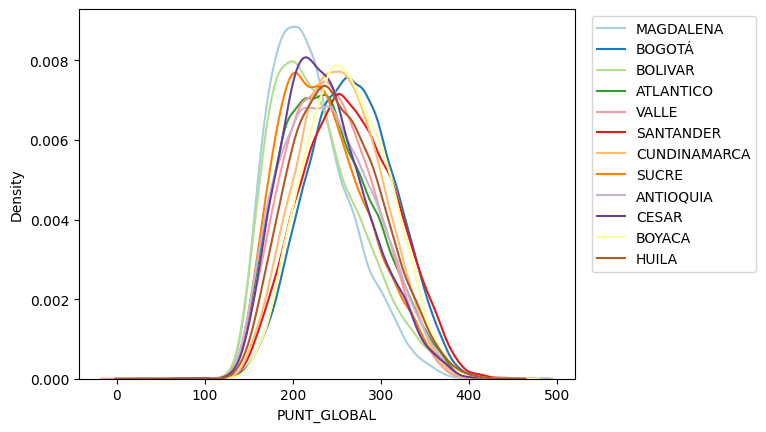

In [53]:
list_punt=["PUNT_LECTURA_CRITICA","PUNT_MATEMATICAS","PUNT_C_NATURALES","PUNT_SOCIALES_CIUDADANAS","PUNT_INGLES","PUNT_GLOBAL"]
for dept in uniques["ESTU_DEPTO_RESIDE"][:12]:
    df_copy=df.copy()
    df_copy=df_copy[df_copy["ESTU_DEPTO_RESIDE"].isin([dept])]  #filtered by exam topic
    # p=sns.histplot(data=df_copy[list_punt[0]],binwidth=1,alpha=0.1,kde=True)
    p=sns.kdeplot(data=df_copy[list_punt[-1]])
plt.legend(uniques["ESTU_DEPTO_RESIDE"][:12],bbox_to_anchor=(1.02,1))
plt.show()


looking at the plot above, plotting distributions of scores by department will be hard

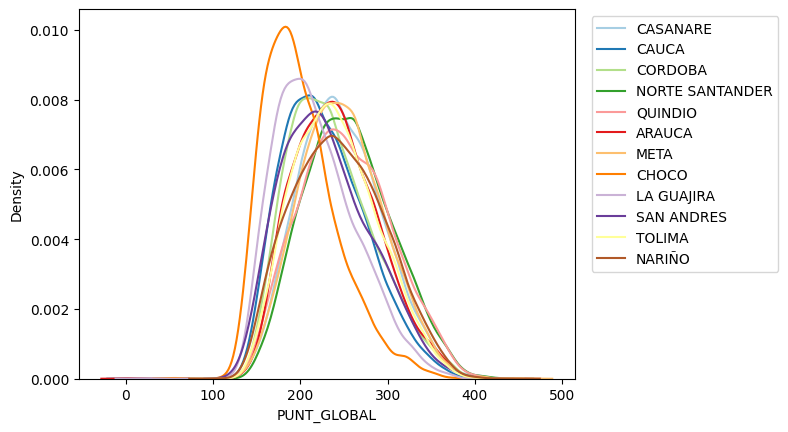

In [54]:
for dept in uniques["ESTU_DEPTO_RESIDE"][12:24]:
    df_copy=df.copy()
    df_copy=df_copy[df_copy["ESTU_DEPTO_RESIDE"].isin([dept])]  #filtered by exam topic
    # p=sns.histplot(data=df_copy[list_punt[0]],binwidth=1,alpha=0.1,kde=True)
    p=sns.kdeplot(data=df_copy[list_punt[-1]])
plt.legend(uniques["ESTU_DEPTO_RESIDE"][12:24],bbox_to_anchor=(1.02,1))
plt.show()

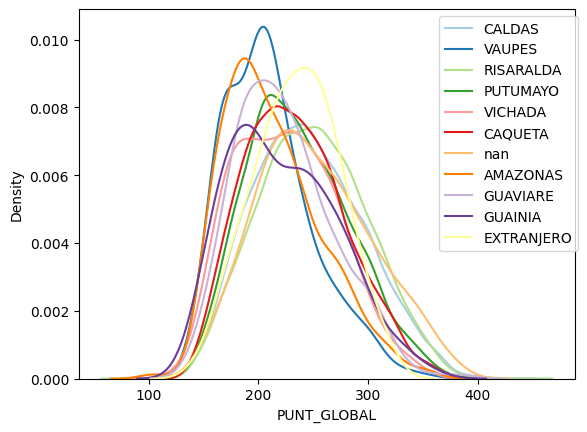

In [55]:
for dept in uniques["ESTU_DEPTO_RESIDE"][24:]:
    df_copy=df.copy()
    df_copy=df_copy[df_copy["ESTU_DEPTO_RESIDE"].isin([dept])]  #filtered by exam topic
    # p=sns.histplot(data=df_copy[list_punt[0]],binwidth=1,alpha=0.1,kde=True)
    p=sns.kdeplot(data=df_copy[list_punt[-1]])
plt.legend(uniques["ESTU_DEPTO_RESIDE"][24:],bbox_to_anchor=(1.02,1))
plt.show()

Now, asking a similar question, but separating by genders:

In [13]:
list_desemp=["DESEMP_LECTURA_CRITICA","DESEMP_MATEMATICAS","DESEMP_C_NATURALES","DESEMP_SOCIALES_CIUDADANAS","DESEMP_INGLES"]
list_punt=["PUNT_LECTURA_CRITICA","PUNT_MATEMATICAS","PUNT_C_NATURALES","PUNT_SOCIALES_CIUDADANAS","PUNT_INGLES","PUNT_GLOBAL"]
df_copy=df.copy()
df_copy=df_copy[list_punt+["ESTU_GENERO"]]
df_copy.groupby(["ESTU_GENERO"],dropna=False).agg([np.mean,np.std,np.max,np.min]).sort_values([("PUNT_GLOBAL","mean")],ascending=False)

PUNT_LECTURA_CRITICA                      PUNT_MATEMATICAS  \
                            mean        std amax amin             mean   
ESTU_GENERO                                                              
M                      52.496135  10.616554  100    0        52.555788   
-                      52.958678   9.787234   75   31        51.595041   
F                      51.870687  10.462860  100    0        48.958786   

                                 PUNT_C_NATURALES             ...  \
                   std amax amin             mean        std  ...   
ESTU_GENERO                                                   ...   
M            12.062005  100    0        49.386166  11.137052  ...   
-            11.599266   80   27        49.289256   9.801733  ...   
F            11.692483  100    0        47.261495  10.339375  ...   

            PUNT_SOCIALES_CIUDADANAS      PUNT_INGLES                          \
                                amax amin        mean        std   amax  amin   
ESTU_GENERO                                                                     
M                                100    0   49.004882  12.833048  100.0   0.0   
-                                 71   25   49.694215  11.564920  100.0  27.0   
F                                100    0   47.919553  12.300142  100.0   0.0   

            PUNT_GLOBAL                       
                   mean        std amax amin  
ESTU_GENERO                                   
M            250.912642  52.437067  477    0  
-            250.016529  46.819331  370  162  
F            242.191565  50.138217  473    0  

[3 rows x 24 columns]

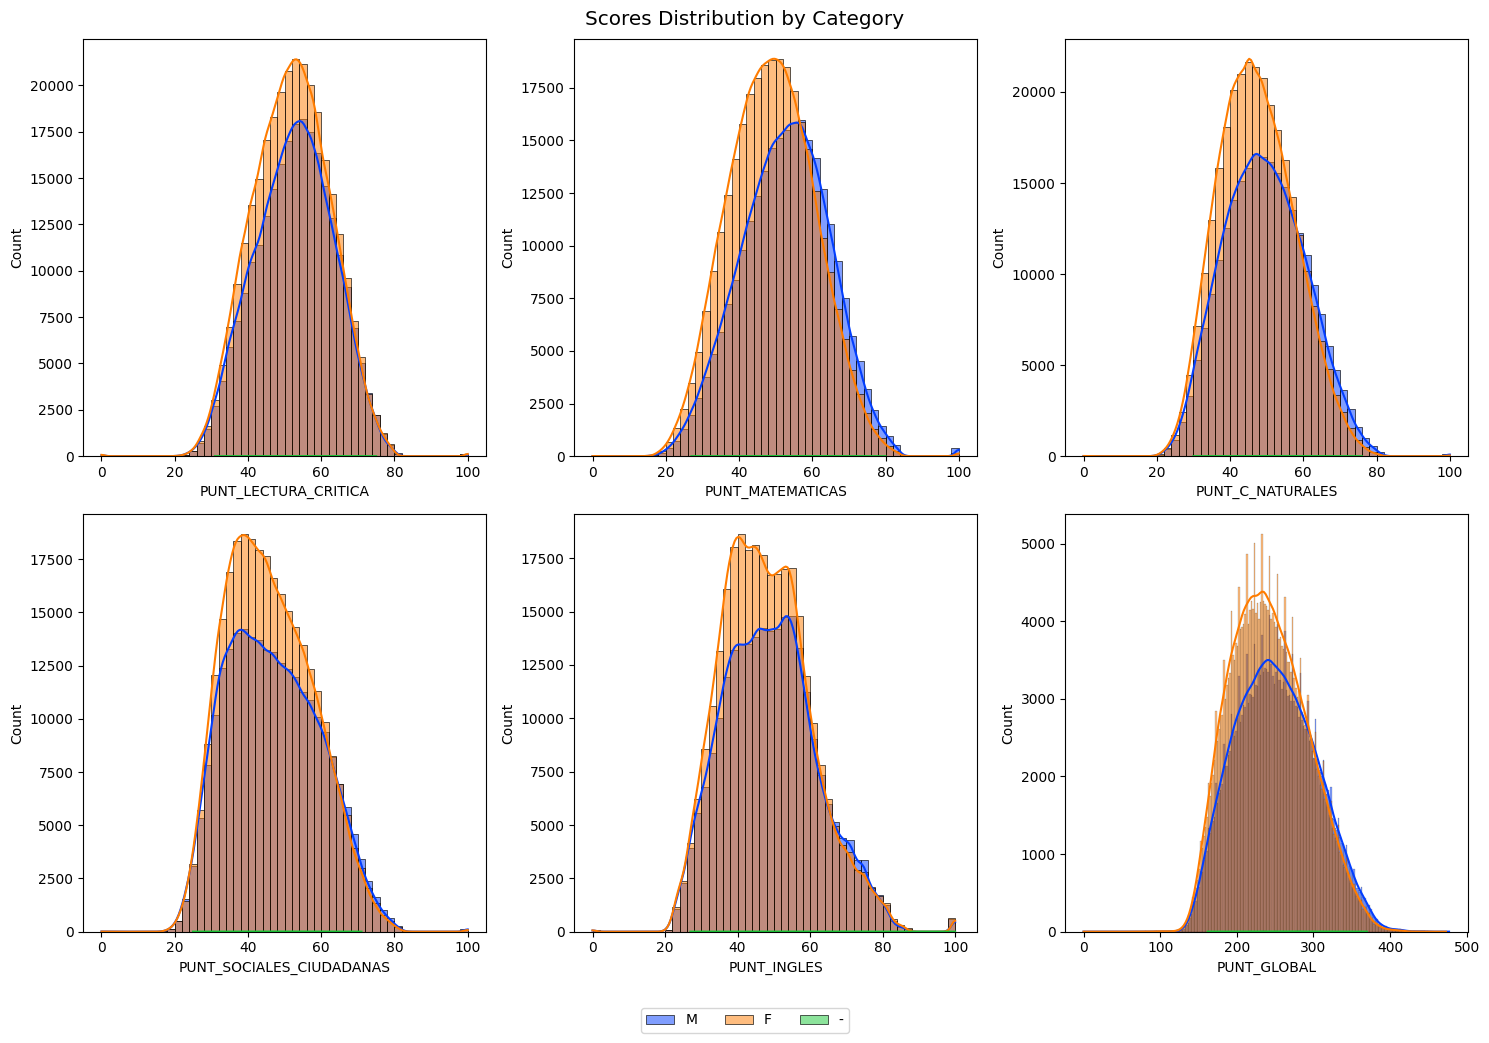

In [62]:
#list_desemp=["DESEMP_LECTURA_CRITICA","DESEMP_MATEMATICAS","DESEMP_C_NATURALES","DESEMP_SOCIALES_CIUDADANAS","DESEMP_INGLES"]
list_punt=["PUNT_LECTURA_CRITICA","PUNT_MATEMATICAS","PUNT_C_NATURALES","PUNT_SOCIALES_CIUDADANAS","PUNT_INGLES","PUNT_GLOBAL"]
sns.set_palette('bright')
sns.color_palette()
fig,axs=plt.subplots(2,3,figsize=(15,10),tight_layout=True)
df_copy=df.copy()
df_copy=df_copy[df_copy["ESTU_GENERO"].isin(['M'])]  #filtered by student gender=M
for i in range(2):
    for j in range(3):
        sns.histplot(data=df_copy[list_punt[3*i+j]],binwidth=2,alpha=0.5,kde=True,ax=axs[i,j],label="M")
        axs[i,j].set_label
df_copy=df.copy()
df_copy=df_copy[df_copy["ESTU_GENERO"].isin(['F'])]  #filtered by student gender=F
for i in range(2):
    for j in range(3):
        sns.histplot(data=df_copy[list_punt[3*i+j]],binwidth=2,alpha=0.5,kde=True,ax=axs[i,j],label="F")
df_copy=df.copy()
df_copy=df_copy[df_copy["ESTU_GENERO"].isin(['-'])]  #filtered by student gender=not specified
for i in range(2):
    for j in range(3):
        sns.histplot(data=df_copy[list_punt[3*i+j]],binwidth=2,alpha=0.5,kde=True,ax=axs[i,j],label="-")
Lines,Label=axs[0,1].get_legend_handles_labels()
fig.legend(Lines,Label,bbox_to_anchor=[0.5,-0.05],loc='lower center',ncol=3)
plt.suptitle("Scores Distribution by Category",fontsize='x-large')
plt.show()

After comparing 

Regarding economic class: Does economic class affect the scores?

In [16]:
df_copy=df.copy()
df_copy=df_copy[["FAMI_ESTRATOVIVIENDA","PERIODO"]]
df_copy.groupby("FAMI_ESTRATOVIVIENDA").count().sort_values(by="PERIODO",ascending=False)

PERIODO
FAMI_ESTRATOVIVIENDA         
Estrato 2              188314
Estrato 1              159977
Estrato 3              108692
-                       34481
Estrato 4               25810
Sin Estrato             17177
Estrato 5                8024
Estrato 6                3711

C:\Users\jsarmiento\AppData\Local\Temp\ipykernel_22328\1169676274.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(labels=df_copy["FAMI_ESTRATOVIVIENDA"].unique(),rotation=90)


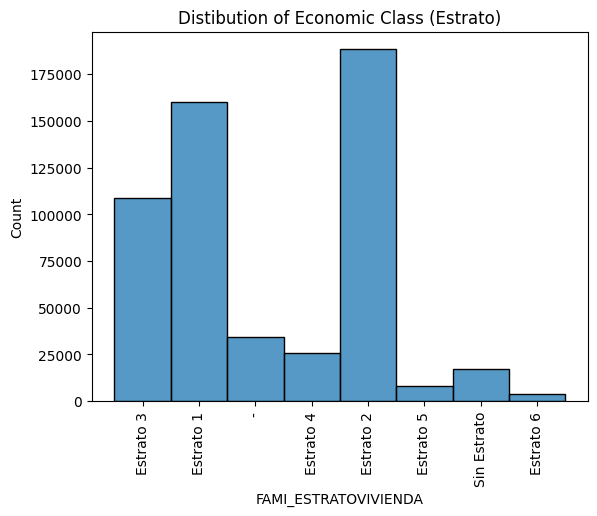

In [17]:
df_copy=df.copy()
p=sns.histplot(data=df_copy,x="FAMI_ESTRATOVIVIENDA")
p.set_xticklabels(labels=df_copy["FAMI_ESTRATOVIVIENDA"].unique(),rotation=90)
plt.title("Distibution of Economic Class (Estrato)")
plt.show()

In [13]:
df_copy=df.copy()
list_punt=["PUNT_LECTURA_CRITICA","PUNT_MATEMATICAS","PUNT_C_NATURALES", "PUNT_SOCIALES_CIUDADANAS","PUNT_INGLES","PUNT_GLOBAL"]
df_copy=df_copy[list_punt+["FAMI_ESTRATOVIVIENDA"]]
df_copy.groupby(["FAMI_ESTRATOVIVIENDA"],dropna=False).agg([np.mean,np.std,np.max,np.min]).sort_values([("PUNT_GLOBAL","mean")],ascending=False)

PUNT_LECTURA_CRITICA                       \
                                     mean        std amax amin   
FAMI_ESTRATOVIVIENDA                                             
Estrato 4                       56.106277  12.018441  100   21   
Estrato 5                       54.925224  12.708827  100   22   
Estrato 3                       55.014362  10.387267  100    0   
Estrato 2                       52.907309   9.907123  100    0   
Estrato 6                       51.848289  13.638435  100   23   
NaN                             51.730769  10.945529   72   27   
Estrato 1                       50.261363   9.808966  100    0   
-                               48.146776  10.938552  100    0   
Sin Estrato                     44.405309   9.626249  100    0   

                     PUNT_MATEMATICAS                      PUNT_C_NATURALES  \
                                 mean        std amax amin             mean   
FAMI_ESTRATOVIVIENDA                                                          
Estrato 4                   55.174390  14.049797  100   17        52.618287   
Estrato 5                   54.112787  15.115851  100   17        51.451147   
Estrato 3                   53.708047  11.968545  100   16        51.136744   
Estrato 2                   51.469498  11.279558  100   15        48.982657   
Estrato 6                   50.546753  16.065966  100   17        48.155484   
NaN                         47.500000  10.343114   71   28        45.000000   
Estrato 1                   48.657157  11.063781  100   15        46.551736   
-                           45.142136  12.028512  100    0        42.358429   
Sin Estrato                 42.154916  10.651022  100    0        41.076731   

                                 ... PUNT_SOCIALES_CIUDADANAS       \
                            std  ...                     amax amin   
FAMI_ESTRATOVIVIENDA             ...                                 
Estrato 4             12.817232  ...                      100    0   
Estrato 5             13.764996  ...                      100    0   
Estrato 3             10.870199  ...                      100   16   
Estrato 2             10.116560  ...                      100    0   
Estrato 6             14.420161  ...                      100   17   
NaN                   11.038116  ...                       69   28   
Estrato 1              9.759949  ...                      100    0   
-                     10.648041  ...                      100    0   
Sin Estrato            8.911140  ...                      100    0   

                     PUNT_INGLES                         PUNT_GLOBAL  \
                            mean        std   amax  amin        mean   
FAMI_ESTRATOVIVIENDA                                                   
Estrato 4              57.085936  15.976550  100.0   0.0  269.947307   
Estrato 5              56.537637  17.952368  100.0  21.0  264.737662   
Estrato 3              53.256535  12.957124  100.0   0.0  261.945240   
Estrato 2              48.891601  11.373555  100.0   0.0  249.833209   
Estrato 6              52.967125  19.275377  100.0   0.0  248.422797   
NaN                    49.115385  12.529412   78.0  27.0  238.653846   
Estrato 1              44.789062  10.277412  100.0   0.0  236.001669   
-                      42.942129  11.899456  100.0   0.0  221.313013   
Sin Estrato            39.557354   9.594040  100.0   0.0  206.434651   

                                           
                            std amax amin  
FAMI_ESTRATOVIVIENDA                       
Estrato 4             62.595543  477   80  
Estrato 5             67.550098  473  123  
Estrato 3             51.963464  467   75  
Estrato 2             47.832557  460   80  
Estrato 6             72.009747  443  112  
NaN                   47.544457  328  158  
Estrato 1             45.640963  439  106  
-                     49.760803  442    0  
Sin Estrato           42.083426  418    0  

[9 rows x 24 columns]

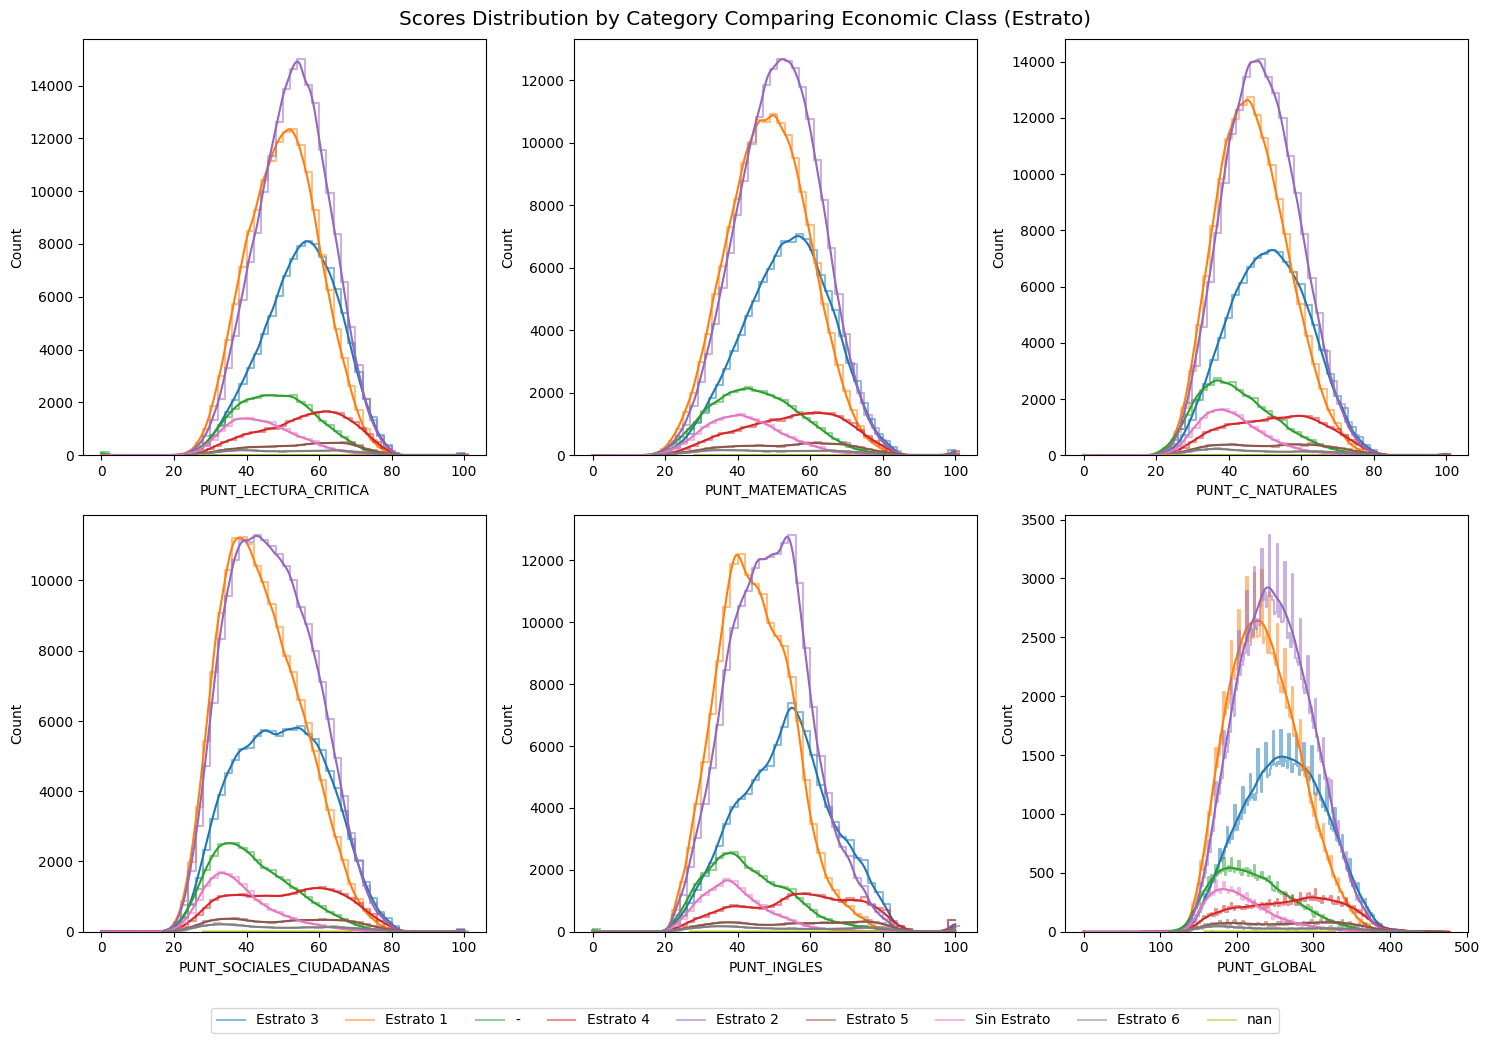

In [19]:
df_copy=df.copy()
fig,axs=plt.subplots(2,3,figsize=(15,10),tight_layout=True)
estratos=uniques["FAMI_ESTRATOVIVIENDA"]
for estrato in estratos:
    df_copy=df.copy()
    df_copy=df_copy[df_copy["FAMI_ESTRATOVIVIENDA"].isin([estrato])]  #filtered by estrato
    for i in range(2):
        for j in range(3):
            sns.histplot(data=df_copy[list_punt[3*i+j]],binwidth=2,alpha=0.5,kde=True,ax=axs[i,j],label=estrato,element="step",fill=False)

Lines,Label=axs[0,1].get_legend_handles_labels()
fig.legend(Lines,Label,bbox_to_anchor=[0.5,-0.05],loc='lower center',ncol=10)
plt.suptitle("Scores Distribution by Category Comparing Economic Class (Estrato)",fontsize='x-large')
plt.show()


Exploring the hypothesis if reading habits affect the score:

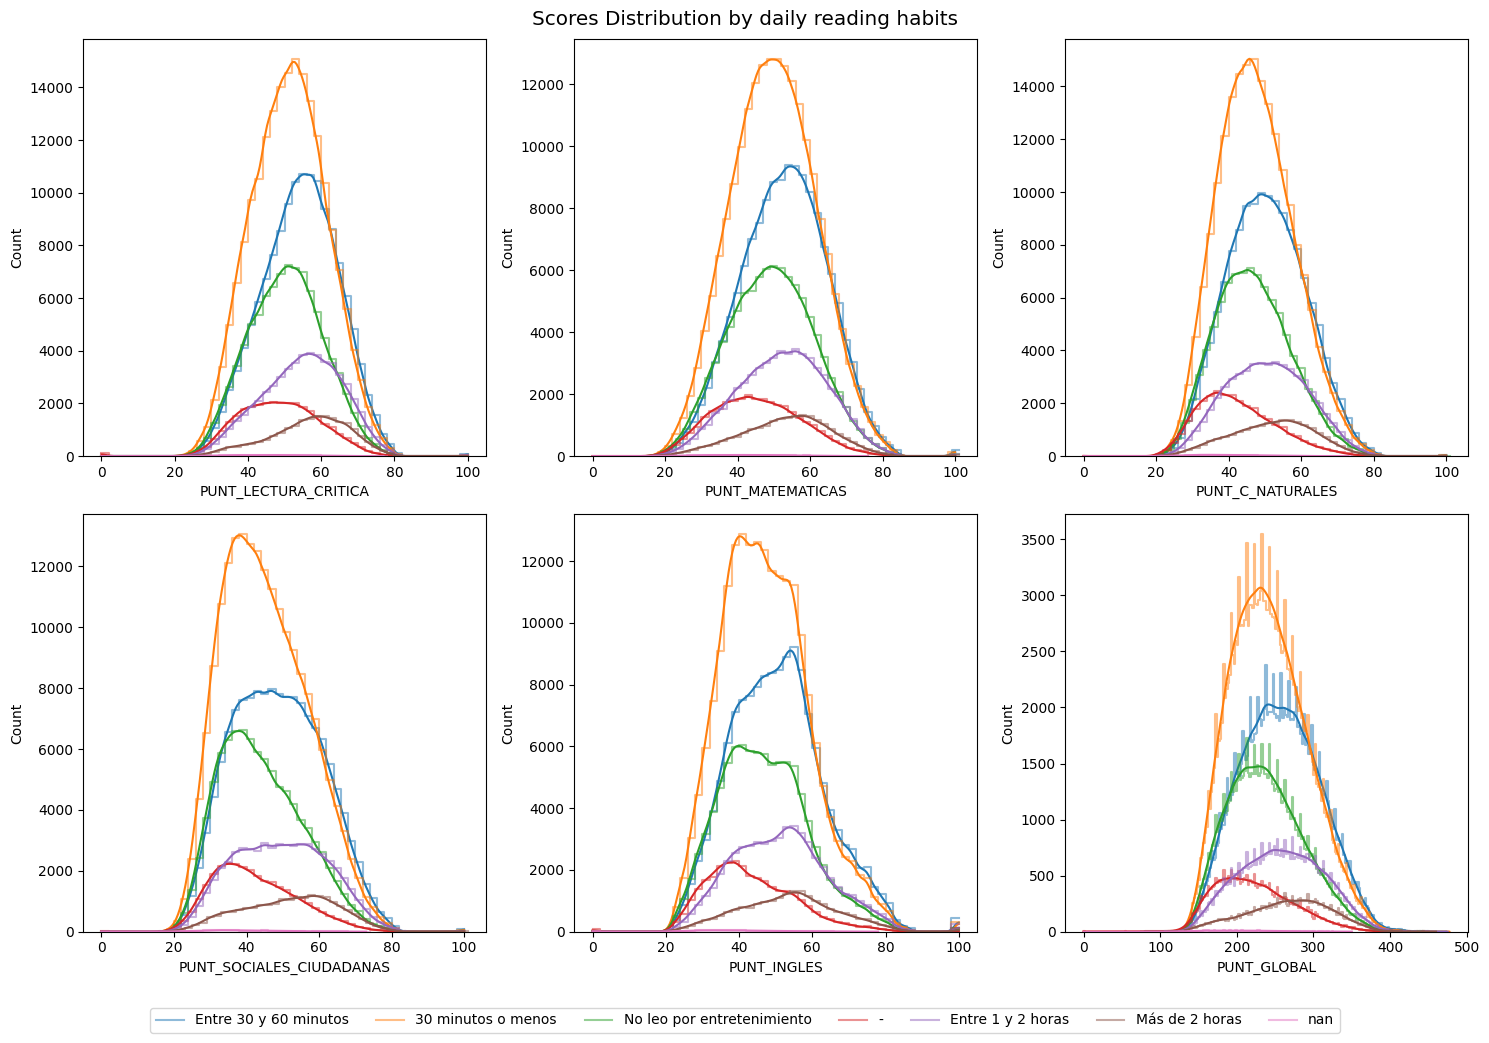

In [29]:
df_copy=df.copy()
fig,axs=plt.subplots(2,3,figsize=(15,10),tight_layout=True)
lecturas=uniques["ESTU_DEDICACIONLECTURADIARIA"]
for lectura in lecturas:
    df_copy=df.copy()
    df_copy=df_copy[df_copy["ESTU_DEDICACIONLECTURADIARIA"].isin([lectura])]  #filtered by daily reading
    for i in range(2):
        for j in range(3):
            sns.histplot(data=df_copy[list_punt[3*i+j]],binwidth=2,alpha=0.5,kde=True,ax=axs[i,j],label=lectura,element="step",fill=False)

Lines,Label=axs[0,1].get_legend_handles_labels()
fig.legend(Lines,Label,bbox_to_anchor=[0.5,-0.05],loc='lower center',ncol=10)
plt.suptitle("Scores Distribution by daily reading habits",fontsize='x-large')
plt.show()

By looking at the distributions, reading does affect the scores in some kind of way, as it can be seen in the LECTURA_CRITICA, SOCIALES_CIUDADANAS and INGLES sections.

Another hypothesis that can be explored is if the education of parents affect the scores:

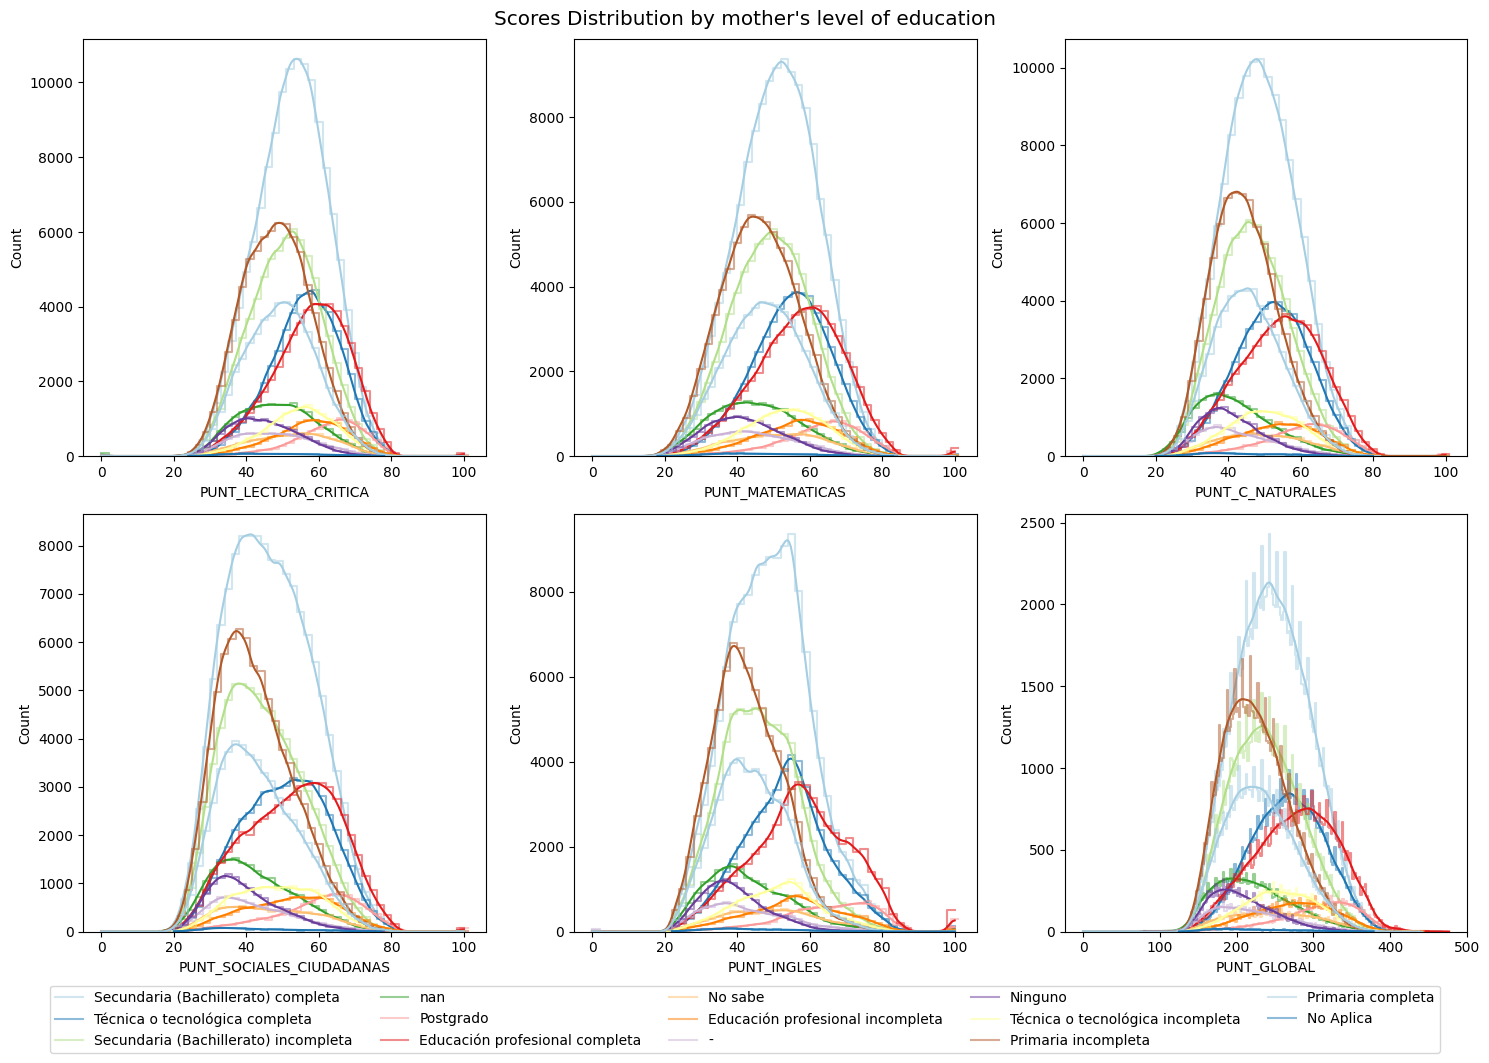

In [43]:
df_copy=df.copy()
fig,axs=plt.subplots(2,3,figsize=(15,10),tight_layout=True)
educams=uniques["FAMI_EDUCACIONMADRE"]
for educam in educams:
    df_copy=df.copy()
    df_copy=df_copy[df_copy["FAMI_EDUCACIONMADRE"].isin([educam])]  #filtered by mother's education
    for i in range(2):
        for j in range(3):
            sns.histplot(data=df_copy[list_punt[3*i+j]],binwidth=2,alpha=0.5,kde=True,ax=axs[i,j],label=educam,element="step",fill=False)

Lines,Label=axs[0,1].get_legend_handles_labels()
fig.legend(Lines,Label,bbox_to_anchor=[0.5,-0.07],loc='lower center',ncol=5)
plt.suptitle("Scores Distribution by mother's level of education",fontsize='x-large')
plt.show()

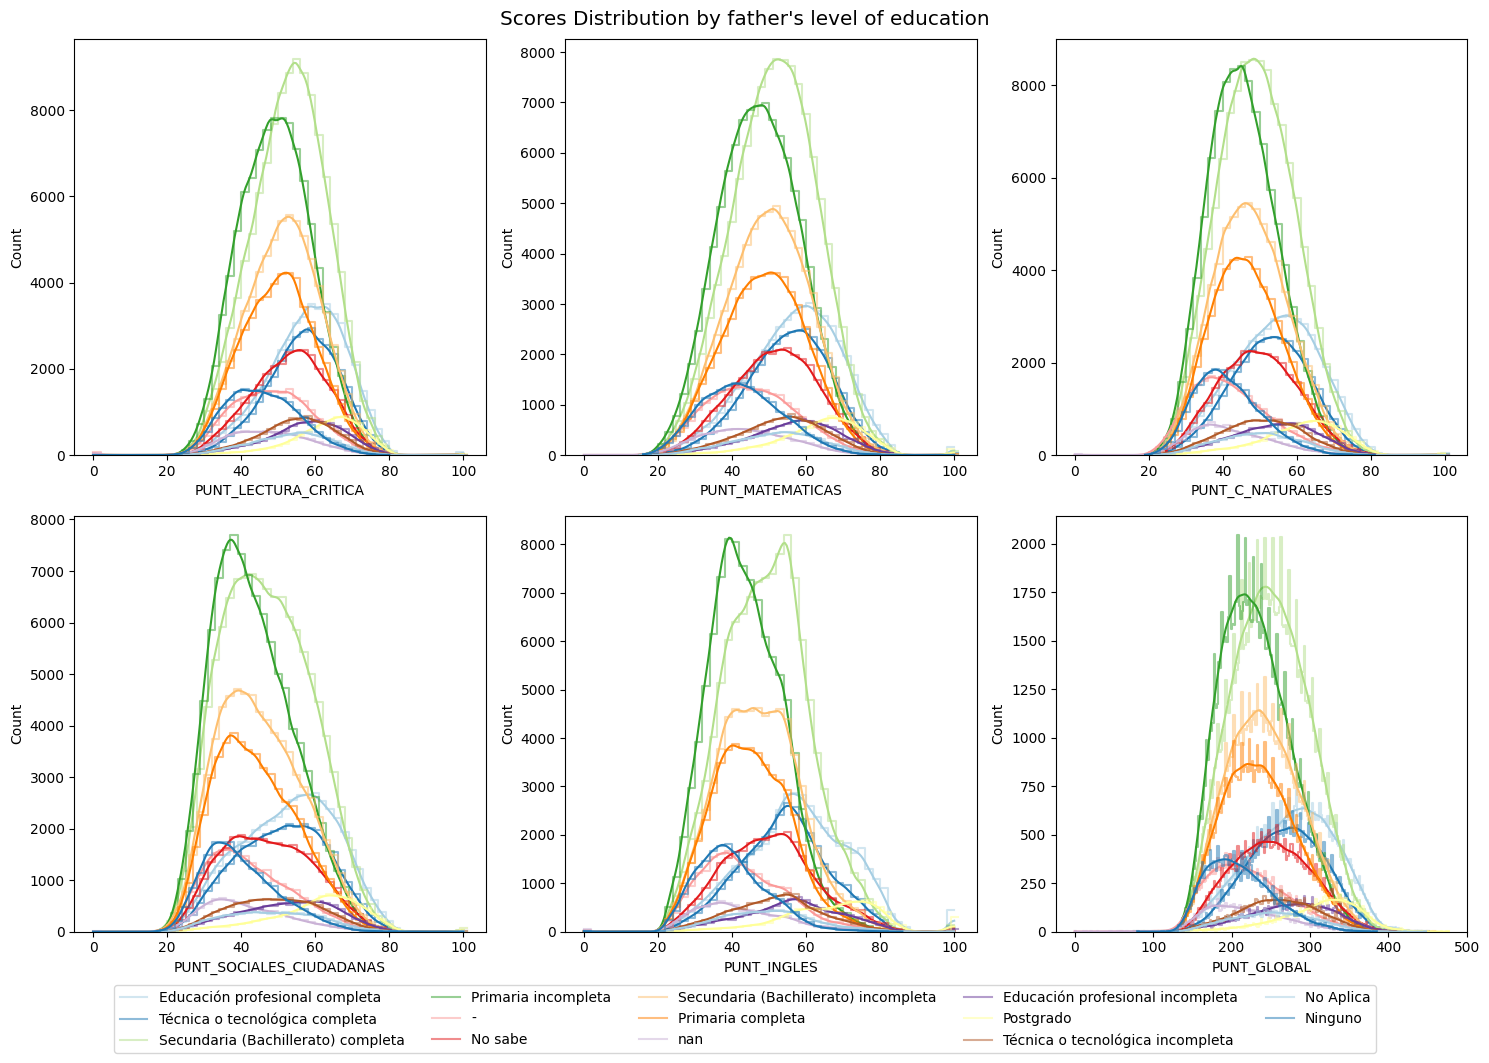

In [44]:
df_copy=df.copy()
fig,axs=plt.subplots(2,3,figsize=(15,10),tight_layout=True)
educaps=uniques["FAMI_EDUCACIONPADRE"]
for educap in educaps:
    df_copy=df.copy()
    df_copy=df_copy[df_copy["FAMI_EDUCACIONPADRE"].isin([educap])]  #filtered by mother's education
    for i in range(2):
        for j in range(3):
            sns.histplot(data=df_copy[list_punt[3*i+j]],binwidth=2,alpha=0.5,kde=True,ax=axs[i,j],label=educap,element="step",fill=False)

Lines,Label=axs[0,1].get_legend_handles_labels()
fig.legend(Lines,Label,bbox_to_anchor=[0.5,-0.07],loc='lower center',ncol=5)
plt.suptitle("Scores Distribution by father's level of education",fontsize='x-large')
plt.show()

Another variable that can be interesting to explore is age, given by the column ESTU_FECHANACIMIENTO: (all rows have values but maybe there's errors. If only a few, can be corrected if it is easy to know why the error exists)

In [4]:
# Looking for errors in the date conversion from string
df_copy=df.copy()
df_copy["FECHANACIMIENTO"]=df_copy["ESTU_FECHANACIMIENTO"]
df_copy["FECHANACIMIENTO"]=pd.to_datetime(df_copy["FECHANACIMIENTO"],infer_datetime_format=True,errors='coerce')
df_copy=df_copy[["ESTU_FECHANACIMIENTO","FECHANACIMIENTO"]]
df_copy[df_copy.isna().any(axis=1)]

ESTU_FECHANACIMIENTO FECHANACIMIENTO
105672  05/16/0001 12:00:00 AM             NaT
428963  05/03/0002 12:00:00 AM             NaT
451677  08/24/0002 12:00:00 AM             NaT
503061  04/17/0002 12:00:00 AM             NaT

In [5]:
# As there are only 4 errors in all dataset, and the error seems a bad case of digitation, 
# the number is changed as date is obiously not year 1 and 2, but maybe 2001 and 2002
df_copy=df.copy()
df_copy["ESTU_FECHANACIMIENTO"]=df_copy["ESTU_FECHANACIMIENTO"].str.replace("/000","/200",regex=True)
df_copy["FECHANACIMIENTO"]=df_copy["ESTU_FECHANACIMIENTO"]
df_copy["FECHANACIMIENTO"]=pd.to_datetime(df_copy["FECHANACIMIENTO"],infer_datetime_format=True,errors='coerce')
df_copy=df_copy[["ESTU_FECHANACIMIENTO","FECHANACIMIENTO"]]
df_copy[df_copy.isna().any(axis=1)]

Empty DataFrame
Columns: [ESTU_FECHANACIMIENTO, FECHANACIMIENTO]
Index: []

In [3]:
#replacing the values on the actual dataset for later, not just the copy
#another column is added with the age of the student->EDAD
df["ESTU_FECHANACIMIENTO"]=df["ESTU_FECHANACIMIENTO"].str.replace("/000","/200",regex=True)
df["ESTU_FECHANACIMIENTO"]=pd.to_datetime(df["ESTU_FECHANACIMIENTO"],infer_datetime_format=True,errors='coerce')
df["dataset_date"]="02/12/2020"
df["dataset_date"]=pd.to_datetime(df["dataset_date"],infer_datetime_format=True)
df["EDAD"]=df["dataset_date"]-df["ESTU_FECHANACIMIENTO"]
df.drop("dataset_date",inplace=True,axis=1)
df["EDAD"]=df["EDAD"]/np.timedelta64(1,'Y')
df["EDAD"]

0         17.982573
1         16.627309
2         18.697167
3         17.799133
4         18.018166
            ...    
546207    20.964154
546208    17.330951
546209    17.224173
546210    17.257028
546211    17.697831
Name: EDAD, Length: 546212, dtype: float64

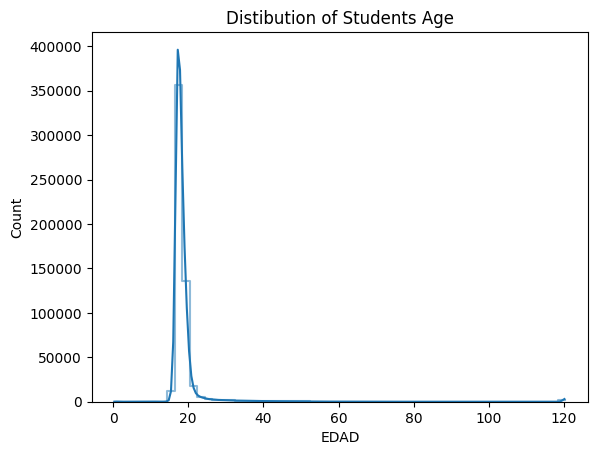

In [7]:
df_copy=df.copy()
p=sns.histplot(data=df_copy,x="EDAD",binwidth=2,alpha=0.5,kde=True,element="step",fill=False)
plt.title("Distibution of Students Age")
plt.show()

In [8]:
df["EDAD"].value_counts()

120.114718    1826
17.396661      866
17.404875      859
17.415826      851
17.385709      850
              ... 
14.245330        1
43.056326        1
55.653436        1
38.429263        1
8.618931         1
Name: EDAD, Length: 11659, dtype: int64

There are 1826 rows missing the student´s birth date information and others that probably have incorrect data (giving value 0 to date functoins returns 1900-01-01, making some of the column EDAD values of 120 which is not correct). Plotting the distribution without counting those:

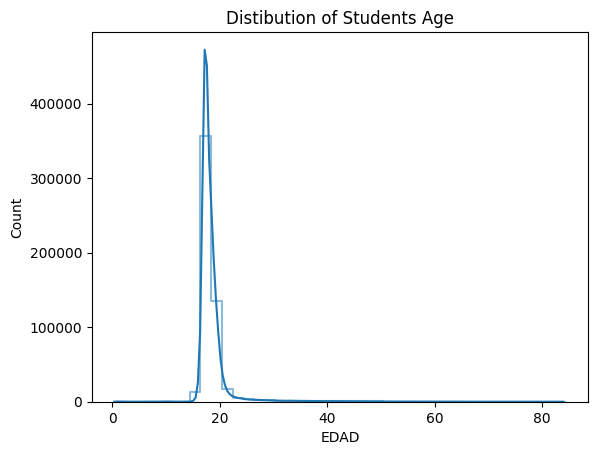

In [9]:
df_copy=df.copy()
df_copy=df_copy.loc[df_copy["EDAD"]<100]
p=sns.histplot(data=df_copy,x="EDAD",binwidth=2,alpha=0.5,kde=True,element="step",fill=False)
plt.title("Distibution of Students Age")
plt.show()

In [11]:
df_copy=df.copy()
df_copy=df_copy.loc[df_copy["EDAD"]<100]
len(df)-len(df_copy)

1852

The amount of rows with incorrect information about the stundent's birth date is somewhere above 1852 rows, given that there are values closer to 0, which is incorrect given the nature of the exam (it's presented when finishing highscool)

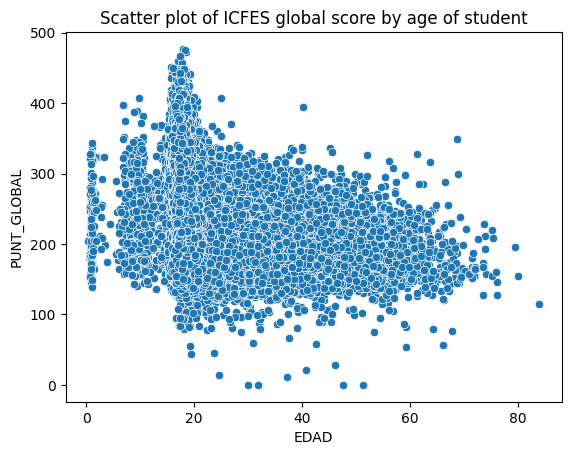

In [12]:
df_copy=df.copy()
df_copy=df_copy.loc[df_copy["EDAD"]<100]
p=sns.scatterplot(data=df_copy,x="EDAD",y="PUNT_GLOBAL")
plt.title("Scatter plot of ICFES global score by age of student")
plt.show()

As it can be seen, there are some outliers in the ages, because there are values closer to 0, and also much lower than 15, an age that some of the youngest tend to present the exam (this last fact is based on personal experience/connections)

Finding outliers in the dataset:

First the scores:

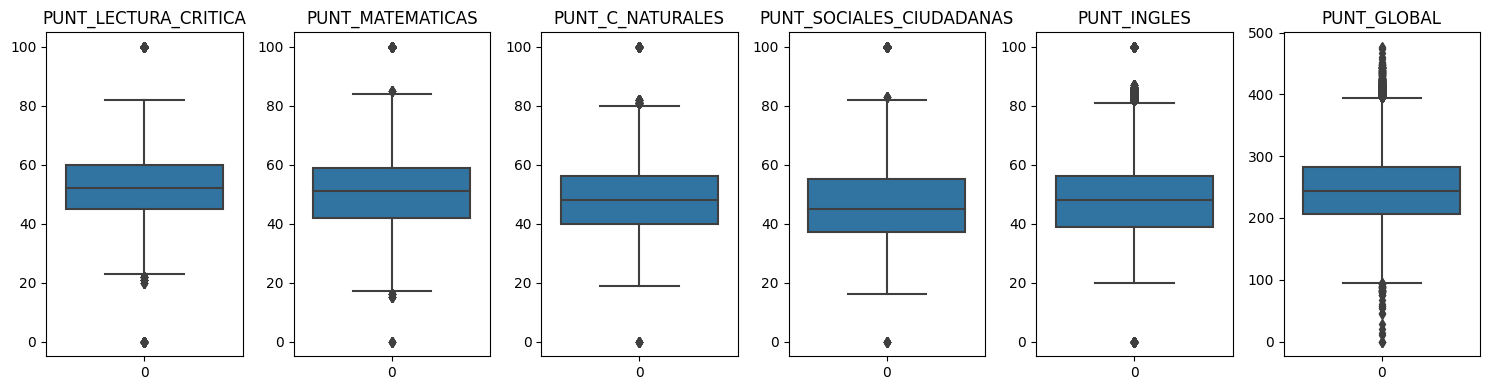

In [21]:
df_copy=df.copy()
fig, axes = plt.subplots(ncols=len(list_punt),figsize=(15,4))
for column, axis in zip(list_punt, axes):
        sns.boxplot(data=df_copy[column], ax=axis) 
        axis.set_title(column)
plt.tight_layout()
plt.show()

The student ages:

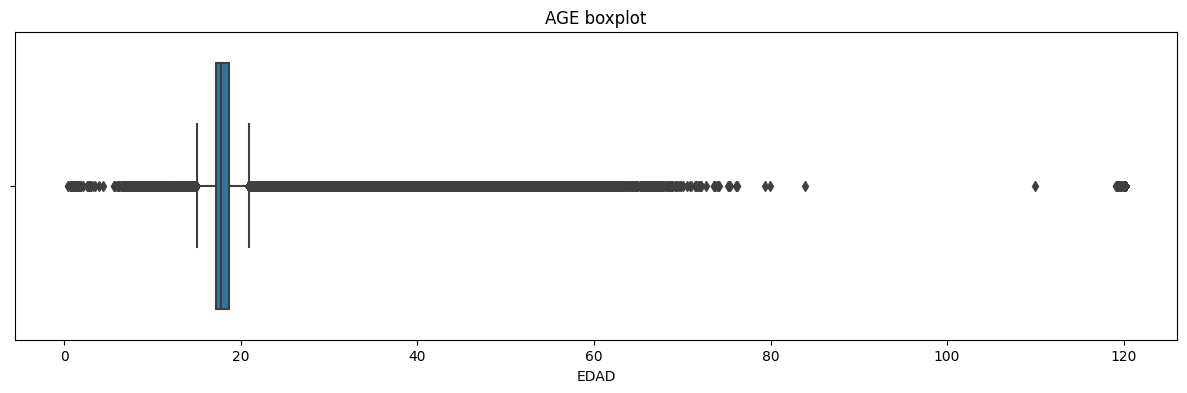

In [26]:
df_copy=df.copy()
plt.figure(figsize=(15,4))
p=sns.boxplot(x=df_copy["EDAD"])
plt.title("AGE boxplot")
plt.show()

Trying to plot boxplots of the scores in comparison of different categories like the ones reviewed and others like parents education

School Location vs score:

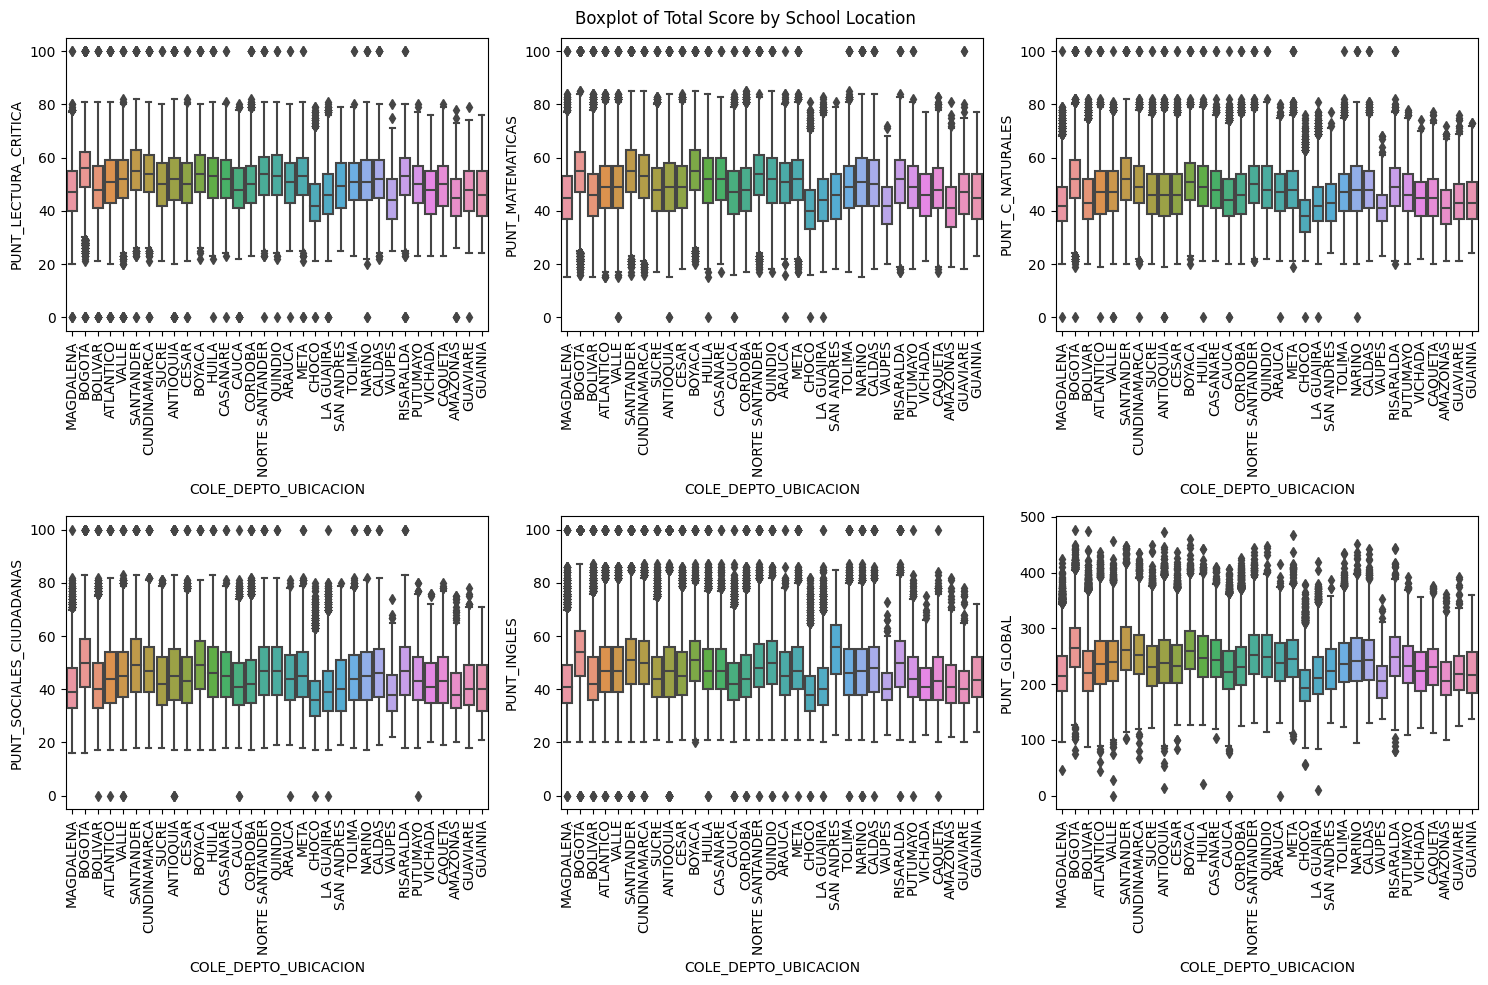

In [24]:
fig,axs=plt.subplots(2,3,figsize=(15,10),tight_layout=True)
for i,categ in enumerate(list_punt):
    df_copy=df.copy()
    sns.boxplot(x=df_copy["COLE_DEPTO_UBICACION"],y=df_copy[categ],ax=axs[i//3,i%3])
    axs[i//3,i%3].tick_params(axis='x',rotation=90)

plt.suptitle("Boxplot of Total Score by School Location")
plt.show()

Boxblot Scores by student location:

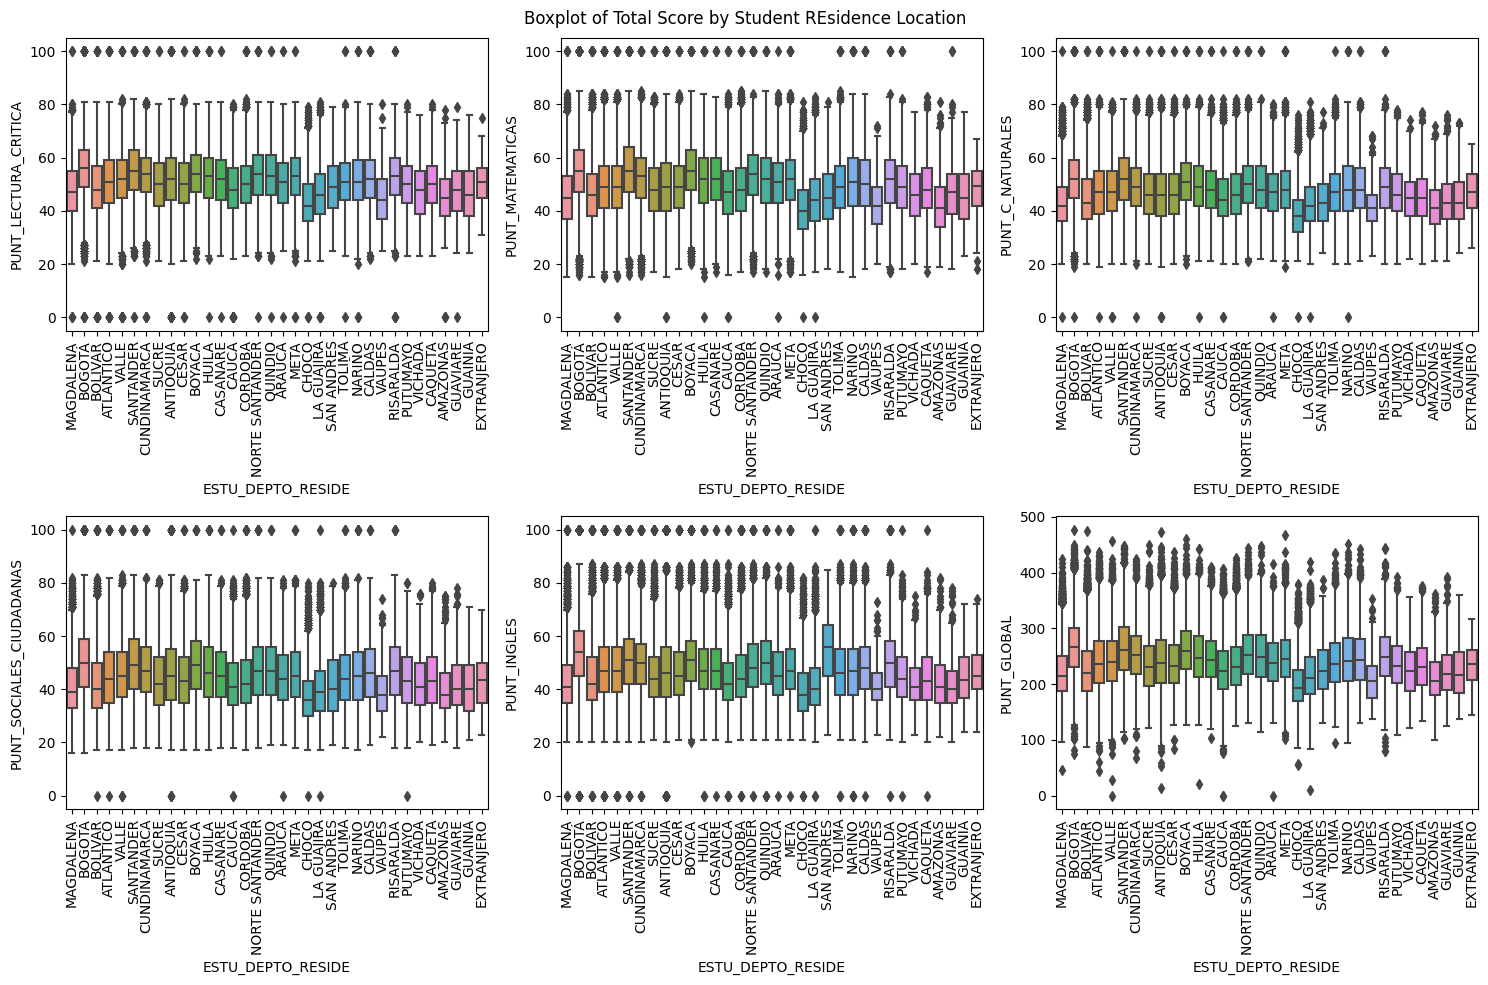

In [26]:
fig,axs=plt.subplots(2,3,figsize=(15,10),tight_layout=True)
for i,categ in enumerate(list_punt):
    df_copy=df.copy()
    sns.boxplot(x=df_copy["ESTU_DEPTO_RESIDE"],y=df_copy[categ],ax=axs[i//3,i%3])
    axs[i//3,i%3].tick_params(axis='x',rotation=90)

plt.suptitle("Boxplot of Total Score by Student REsidence Location")
plt.show()

By economic classification (estrato):

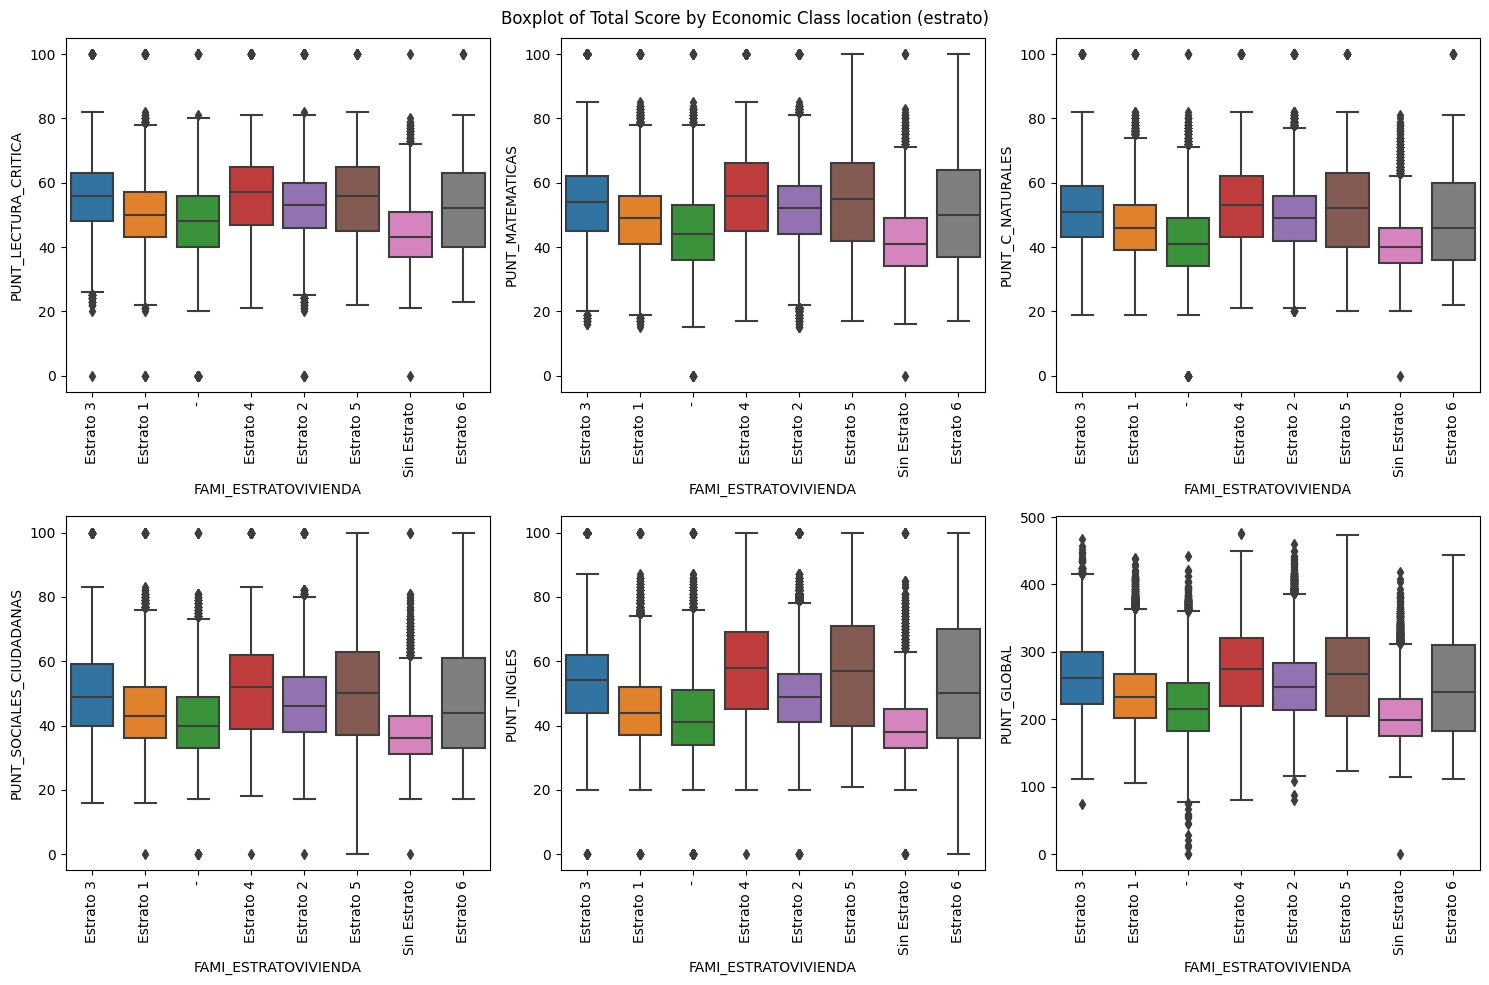

In [28]:
fig,axs=plt.subplots(2,3,figsize=(15,10),tight_layout=True)
for i,categ in enumerate(list_punt):
    df_copy=df.copy()
    sns.boxplot(x=df_copy["FAMI_ESTRATOVIVIENDA"],y=df_copy[categ],ax=axs[i//3,i%3])
    axs[i//3,i%3].tick_params(axis='x',rotation=90)

plt.suptitle("Boxplot of Total Score by Economic Class location (estrato)")
plt.show()

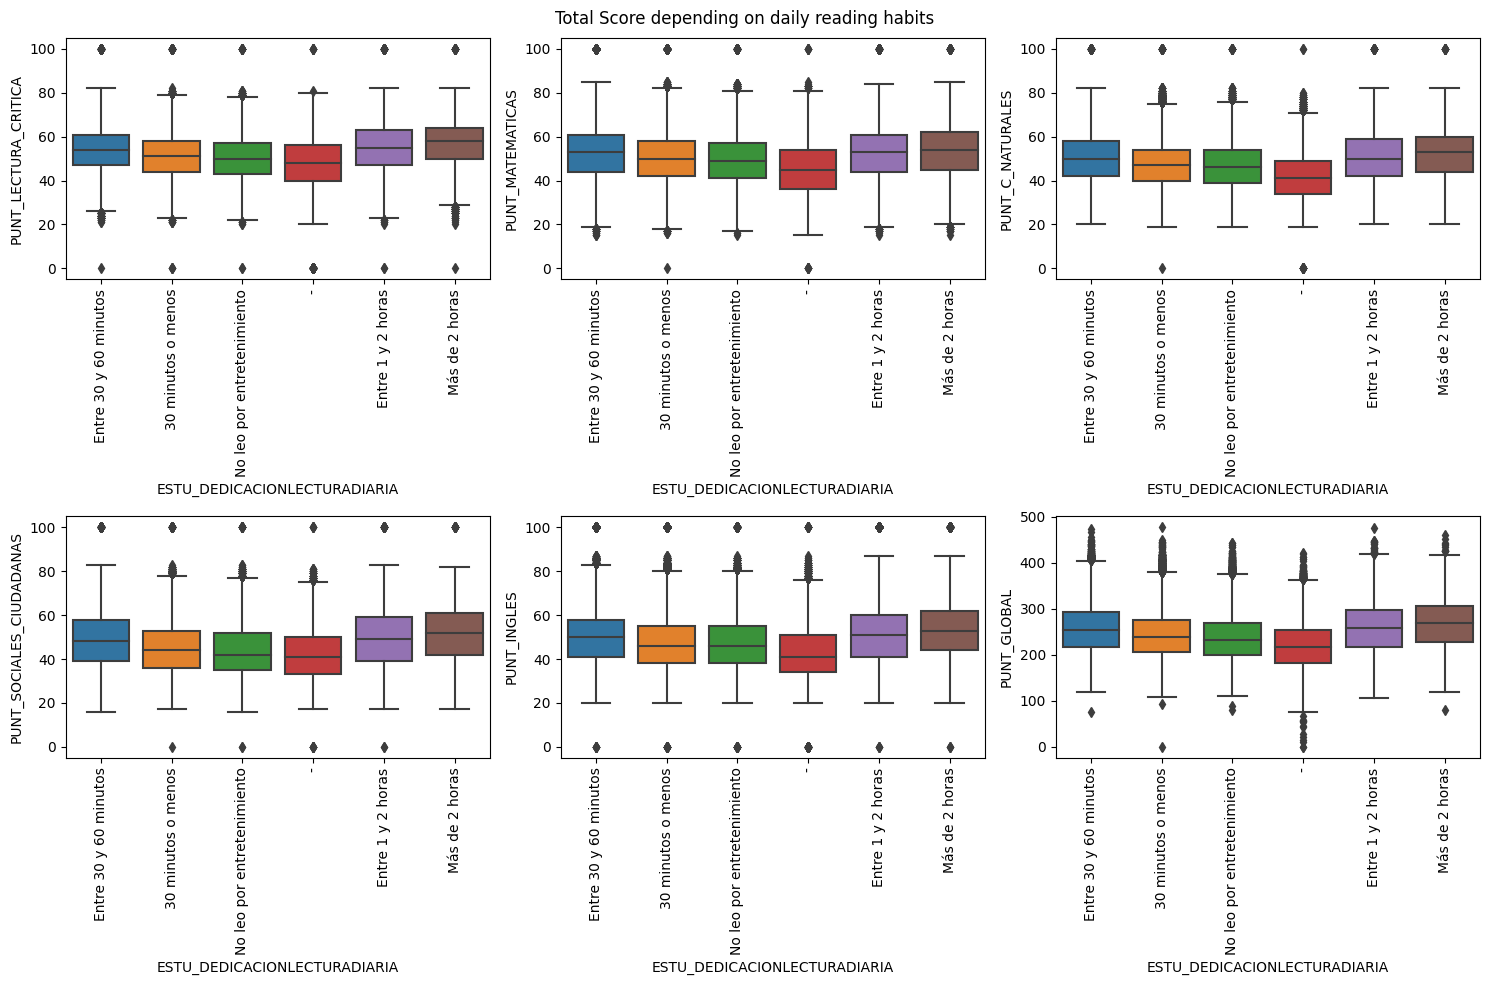

In [29]:
fig,axs=plt.subplots(2,3,figsize=(15,10),tight_layout=True)
for i,categ in enumerate(list_punt):
    df_copy=df.copy()
    sns.boxplot(x=df_copy["ESTU_DEDICACIONLECTURADIARIA"],y=df_copy[categ],ax=axs[i//3,i%3])
    axs[i//3,i%3].tick_params(axis='x',rotation=90)

plt.suptitle("Total Score depending on daily reading habits")
plt.show()

By parents education:

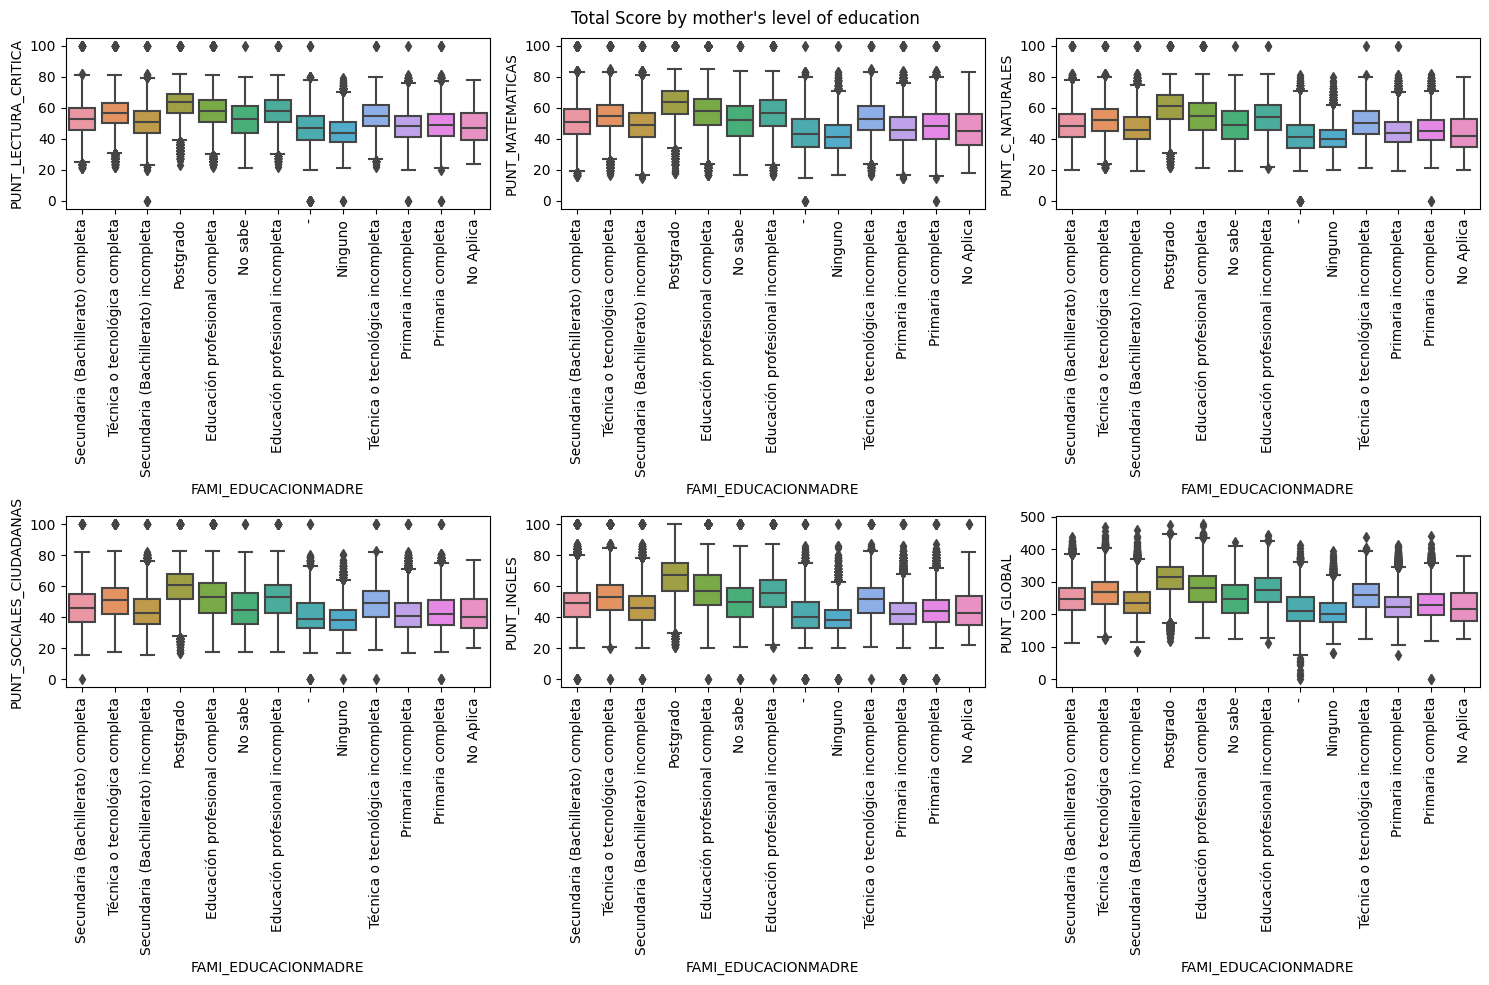

In [32]:
fig,axs=plt.subplots(2,3,figsize=(15,10),tight_layout=True)
for i,categ in enumerate(list_punt):
    df_copy=df.copy()
    sns.boxplot(x=df_copy["FAMI_EDUCACIONMADRE"],y=df_copy[categ],ax=axs[i//3,i%3])
    axs[i//3,i%3].tick_params(axis='x',rotation=90)

plt.suptitle("Total Score by mother's level of education")
plt.show()

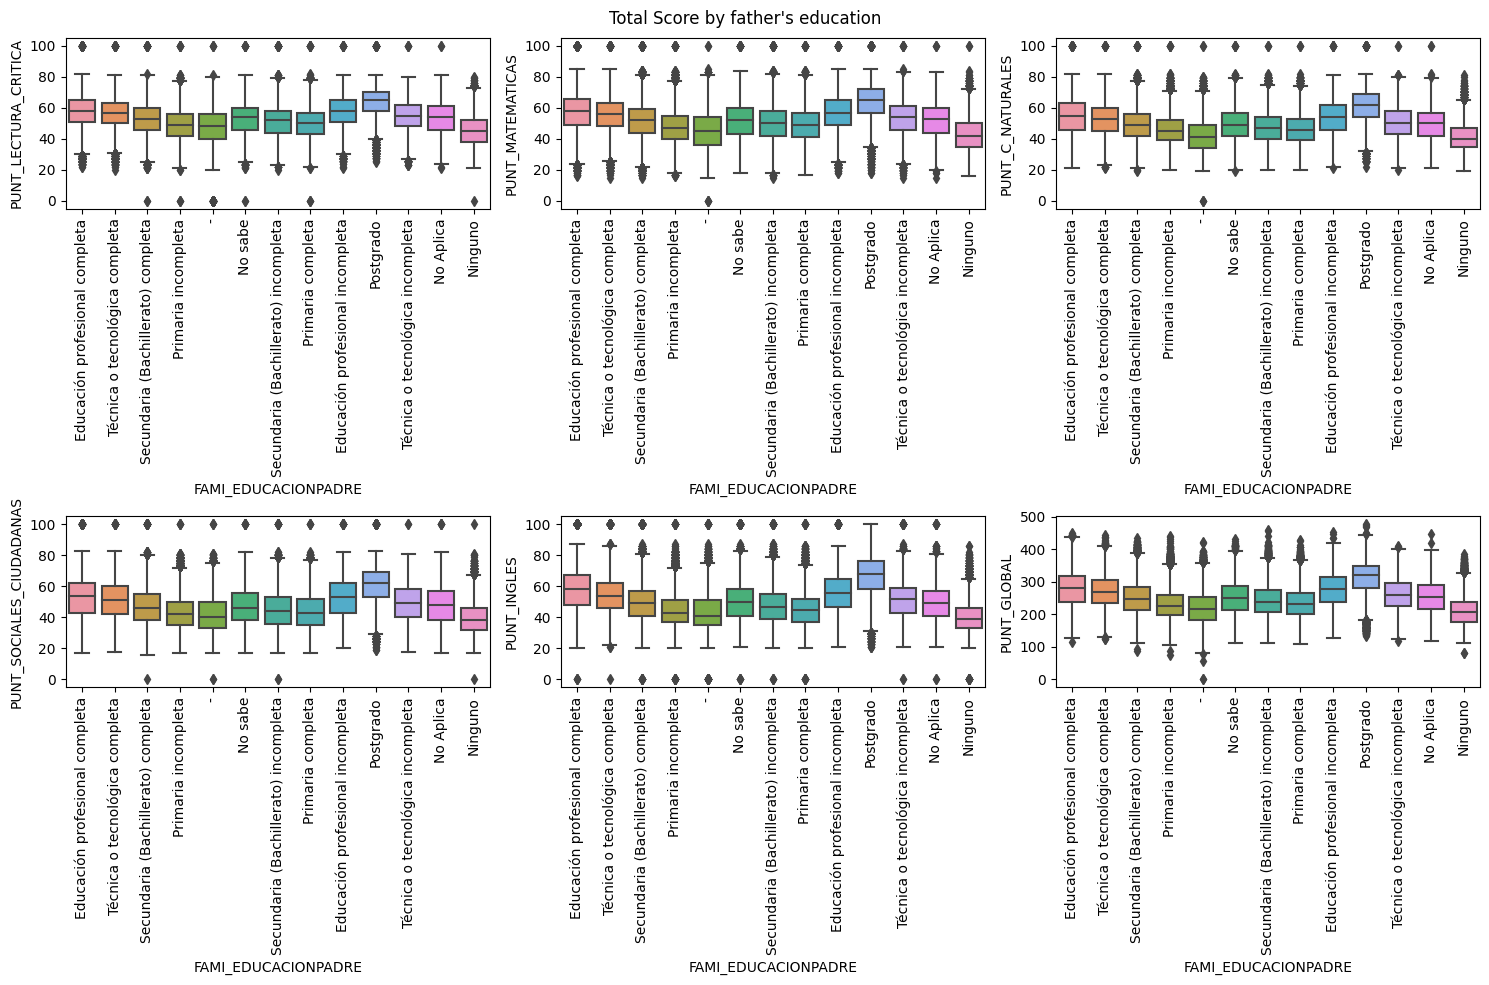

In [33]:
fig,axs=plt.subplots(2,3,figsize=(15,10),tight_layout=True)
for i,categ in enumerate(list_punt):
    df_copy=df.copy()
    sns.boxplot(x=df_copy["FAMI_EDUCACIONPADRE"],y=df_copy[categ],ax=axs[i//3,i%3])
    axs[i//3,i%3].tick_params(axis='x',rotation=90)

plt.suptitle("Total Score by father's education")
plt.show()

### Cleaning the dataset:

After seeing some of the relationships between the categorical data and the numerical data, some columns can be dropped and others can be preserved

In [17]:
df_clean=df.copy()
columns_drop=[
    #"ESTU_TIPODOCUMENTO",  #info is already in columns of nationality and age  #correction: can be used to infer age
    "ESTU_GENERO", #as seen from the relation between gender and scores, it can be dropped
    "ESTU_FECHANACIMIENTO",   #column edad was already taken from this
    "PERIODO",  # is a constant value
    "ESTU_CONSECUTIVO",  #is a unique number per student
    "ESTU_ESTUDIANTE",   #apparently it's just saying if the person is currently a student, and is a constant value in the dataset
    "ESTU_PAIS_RESIDE",  #can be correlated with ESTU_NACIONALIDAD, which was one of the explored variables
    "ESTU_TIENEETNIA",   #its only two or three values if counting nans, also the info is already in ESTU_ETNIA, which has more info
    "ESTU_COD_RESIDE_DEPTO","ESTU_MCPIO_RESIDE","ESTU_COD_RESIDE_MCPIO",  #these are all related to ESTU_DEPTO_RESIDE and is too specific, creating a lot more categories and variables
    "FAMI_PERSONASHOGAR",  #this variable wasn´t explored, and can vary depending on other factors such as FAMI_ESTRATOVIVIENDA,FAMI_SITUACION_ECONOMICA
    "FAMI_CUARTOSHOGAR",  #this variable wasn´t explored, and can vary depending on other factors such as FAMI_ESTRATOVIVIENDA,FAMI_SITUACION_ECONOMICA
    "FAMI_TRABAJOLABORPADRE",  #has a high relation with FAMI_EDUCACIONPADRE
    "FAMI_TRABAJOLABORMADRE",  #has a high relation with FAMI_EDUCACIONMADRE
    "FAMI_TIENEINTERNET",   #these variables are mainly used to determine the data in columns ESTU_INSE_INDIVIDUAL and ESTU_NSE_INDIVIDUAL,
    "FAMI_TIENESERVICIOTV",         #as can be read in the icfes manual: 
    "FAMI_TIENECOMPUTADOR",            #https://www2.icfes.gov.co/documents/39286/2231027/Edicion+4+-+boletin+saber+al+detalle+.pdf/f9a33ad6-7559-99a5-5f7f-16d2f9b16f76?version=1.0&t=1647958803251
    "FAMI_TIENELAVADORA",
    "FAMI_TIENEHORNOMICROOGAS",
    "FAMI_TIENEAUTOMOVIL",
    "FAMI_TIENEMOTOCICLETA",
    "FAMI_TIENECONSOLAVIDEOJUEGOS",
    "FAMI_NUMLIBROS",   #probably relates to ESTU_DEDICACIONLECTURADIARIA
    "FAMI_COMELECHEDERIVADOS",   #not explored, not relevant
    "FAMI_COMECARNEPESCADOHUEVO",    #not explored, not relevant
    "FAMI_COMECEREALFRUTOSLEGUMBRE",    #not explored, not relevant
    "FAMI_SITUACIONECONOMICA",    #this column I did not understand, maybe goes in hand with FAMI_ESTRATO
    "ESTU_DEDICACIONINTERNET",   #this variable wasn´t explored
    "ESTU_HORASSEMANATRABAJA",   #this is not numerical but categorical and could just add complexity in the future when creating a model
    "ESTU_TIPOREMUNERACION",     #tied with last variable
    "COLE_CODIGO_ICFES",   #Unique for each school, the variable can be too specific (lots of values/categories)
    "COLE_COD_DANE_ESTABLECIMIENTO",   #Unique for each school, the variable can be too specific (lots of values/categories)
    "COLE_NOMBRE_ESTABLECIMIENTO",  #Unique for each school, the variable can be too specific (lots of values/categories), probably just used by the schools to retreive the results
    "COLE_GENERO",    #slight relation to student gender
    "COLE_COD_DANE_SEDE",   #unique for each school, not relevant to students
    "COLE_NOMBRE_SEDE",    #related to school name and other school variables
    "COLE_SEDE_PRINCIPAL",  #related to last variable
    "COLE_AREA_UBICACION",   #not explored, can be tied to FAMI_ESTRATOVIVIENDA but not 100%
    "COLE_JORNADA",    #can be related with COLE_NATURALEZA
    "COLE_COD_MCPIO_UBICACION",    #tied to next variable, not relevant to student variables explored
    "COLE_MCPIO_UBICACION",   #info is too specific, a more general variable but with variety is with COLE_DEPTO_UBICACION
    "COLE_COD_DEPTO_UBICACION",  #tied to COLE_DEPTO_UBICACION
    "ESTU_PRIVADO_LIBERTAD",   #variable not explored, maybe it affects the scores
    "ESTU_COD_MCPIO_PRESENTACION",   #tied to next variable in this list
    "ESTU_MCPIO_PRESENTACION",   #info too specific, will choose DEPTO over MCPIO in these cases
    "ESTU_DEPTO_PRESENTACION",   #It's highly probable that this is tied with ESTU_DEPTO_RESIDE
    "ESTU_COD_DEPTO_PRESENTACION", #tied to last variable
    "PERCENTIL_LECTURA_CRITICA",  #Drop all PERCENTIL and DESEMP columns since they have correlation with the columns PUNT
    "DESEMP_LECTURA_CRITICA",
    "PERCENTIL_MATEMATICAS",
    "DESEMP_MATEMATICAS",
    "PERCENTIL_C_NATURALES",
    "DESEMP_C_NATURALES",
    "PERCENTIL_SOCIALES_CIUDADANAS",
    "DESEMP_SOCIALES_CIUDADANAS",
    "PERCENTIL_INGLES",
    "DESEMP_INGLES",
    "PERCENTIL_GLOBAL",
    "ESTU_INSE_INDIVIDUAL",    #is related to most of FAMI_.... variables, as it is calculated with them, will choose NSE over INSE
    "ESTU_NSE_ESTABLECIMIENTO",    #did not understand this variable
    "ESTU_ESTADOINVESTIGACION",   #did not understand this variable
    "ESTU_GENERACION-E"   #category based on the general result, can be related to COLE_NATURALEZA based on the description of the goverment program Generación E
]

In [18]:
df_clean.drop(columns_drop,inplace=True,axis=1)

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546212 entries, 0 to 546211
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ESTU_TIPODOCUMENTO            546212 non-null  object 
 1   ESTU_NACIONALIDAD             546212 non-null  object 
 2   ESTU_ETNIA                    546212 non-null  object 
 3   ESTU_DEPTO_RESIDE             545835 non-null  object 
 4   FAMI_ESTRATOVIVIENDA          546186 non-null  object 
 5   FAMI_EDUCACIONPADRE           537920 non-null  object 
 6   FAMI_EDUCACIONMADRE           525253 non-null  object 
 7   ESTU_DEDICACIONLECTURADIARIA  545585 non-null  object 
 8   COLE_NATURALEZA               546212 non-null  object 
 9   COLE_CALENDARIO               546212 non-null  object 
 10  COLE_BILINGUE                 546212 non-null  object 
 11  COLE_CARACTER                 532464 non-null  object 
 12  COLE_DEPTO_UBICACION          546212 non-nul

In [20]:
df_clean.isnull().sum()

ESTU_TIPODOCUMENTO                  0
ESTU_NACIONALIDAD                   0
ESTU_ETNIA                          0
ESTU_DEPTO_RESIDE                 377
FAMI_ESTRATOVIVIENDA               26
FAMI_EDUCACIONPADRE              8292
FAMI_EDUCACIONMADRE             20959
ESTU_DEDICACIONLECTURADIARIA      627
COLE_NATURALEZA                     0
COLE_CALENDARIO                     0
COLE_BILINGUE                       0
COLE_CARACTER                   13748
COLE_DEPTO_UBICACION                0
PUNT_LECTURA_CRITICA                0
PUNT_MATEMATICAS                    0
PUNT_C_NATURALES                    0
PUNT_SOCIALES_CIUDADANAS            0
PUNT_INGLES                        19
PUNT_GLOBAL                         0
ESTU_NSE_INDIVIDUAL             17041
EDAD                                0
dtype: int64

Null values from above are higher from actual missing values, for example in some of this columns there is a "-" instead, or for example in the column EDAD, the "weird" values like 120 can be interpreted as null values.

To correct some of these posible missing values, "-" character will be replaced with Null values.

In [21]:
df_clean=df_clean.replace("-",np.nan,regex=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546212 entries, 0 to 546211
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ESTU_TIPODOCUMENTO            546212 non-null  object 
 1   ESTU_NACIONALIDAD             546210 non-null  object 
 2   ESTU_ETNIA                    40009 non-null   object 
 3   ESTU_DEPTO_RESIDE             545835 non-null  object 
 4   FAMI_ESTRATOVIVIENDA          511705 non-null  object 
 5   FAMI_EDUCACIONPADRE           515685 non-null  object 
 6   FAMI_EDUCACIONMADRE           515845 non-null  object 
 7   ESTU_DEDICACIONLECTURADIARIA  514477 non-null  object 
 8   COLE_NATURALEZA               546212 non-null  object 
 9   COLE_CALENDARIO               546212 non-null  object 
 10  COLE_BILINGUE                 458780 non-null  object 
 11  COLE_CARACTER                 531418 non-null  object 
 12  COLE_DEPTO_UBICACION          546212 non-nul

In [22]:
df_clean.isnull().sum()

ESTU_TIPODOCUMENTO                   0
ESTU_NACIONALIDAD                    2
ESTU_ETNIA                      506203
ESTU_DEPTO_RESIDE                  377
FAMI_ESTRATOVIVIENDA             34507
FAMI_EDUCACIONPADRE              30527
FAMI_EDUCACIONMADRE              30367
ESTU_DEDICACIONLECTURADIARIA     31735
COLE_NATURALEZA                      0
COLE_CALENDARIO                      0
COLE_BILINGUE                    87432
COLE_CARACTER                    14794
COLE_DEPTO_UBICACION                 0
PUNT_LECTURA_CRITICA                 0
PUNT_MATEMATICAS                     0
PUNT_C_NATURALES                     0
PUNT_SOCIALES_CIUDADANAS             0
PUNT_INGLES                         19
PUNT_GLOBAL                          0
ESTU_NSE_INDIVIDUAL              17045
EDAD                                 0
dtype: int64

Now the number of Null values increased as expected. Now the problem is that the missing data constitutes a considerable percentage of the dataset, or even the majority of it like the column ESTU_ETNIA.

Currently the values in the PUNT_INGLES column can be obtained from the other PUNT_... columns:

GLOBAL= { [ (C_NATURALES + MATEMATICAS + LECTURA_CRITICA + SOCIALES_CIUDADANAS)\*3 + INGLES]/13 }\*5

Then,

INGLES= GLOBAL\*13/5 - (C_NATURALES + MATEMATICAS + LECTURA_CRITICA + SOCIALES_CIUDADANAS)\*3


Info found at: 

https://www.ipler.edu.co/blog/como-interpretar-los-resultados-de-la-prueba-saber-11/

https://www.eltiempo.com/vida/educacion/pruebas-saber-11-como-entender-los-resultados-721693


In [23]:
df_clean["new_english"]=df_clean["PUNT_GLOBAL"]*13/5-df_clean["PUNT_C_NATURALES"]*3-df_clean["PUNT_MATEMATICAS"]*3-df_clean["PUNT_LECTURA_CRITICA"]*3-df_clean["PUNT_SOCIALES_CIUDADANAS"]*3
df_clean["new_english"]=df_clean["new_english"].astype('int')
df_clean["COPY_PUNT_INGLES"]=df_clean["PUNT_INGLES"]
df_clean["COPY_PUNT_INGLES"]=df_clean["COPY_PUNT_INGLES"].fillna(0)
df_clean["diff_en"]=df_clean["new_english"]-df_clean["COPY_PUNT_INGLES"]
nans_english=df_clean[df_clean["PUNT_INGLES"].isna()]
nans_english

ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_ETNIA ESTU_DEPTO_RESIDE  \
51706                  CC          COLOMBIA  Guambiano             CAUCA   
57507                  CC          COLOMBIA       Paez             CAUCA   
138634                 CC          COLOMBIA       Paez             CAUCA   
161637                 CC          COLOMBIA        NaN         MAGDALENA   
195819                 CC          COLOMBIA       Paez             CAUCA   
224537                 TI          COLOMBIA       Paez             CAUCA   
238166                 TI          COLOMBIA       Zenú           CORDOBA   
321977                 TI          COLOMBIA       Paez             CAUCA   
329097                 TI          COLOMBIA       Paez             CAUCA   
329368                 CC          COLOMBIA       Paez             CAUCA   
334414                 TI          COLOMBIA       Paez             CAUCA   
336160                 CC          COLOMBIA       Paez             CAUCA   
340629                 TI          COLOMBIA       Paez             CAUCA   
353566                 TI          COLOMBIA       Paez             CAUCA   
354397                 CC          COLOMBIA      Wayúu        LA GUAJIRA   
399633                 CC          COLOMBIA       Paez             CAUCA   
434454                 CC          COLOMBIA       Paez             CAUCA   
444525                 TI          COLOMBIA       Paez             CAUCA   
516499                 TI          COLOMBIA       Paez             CAUCA   

       FAMI_ESTRATOVIVIENDA                 FAMI_EDUCACIONPADRE  \
51706                   NaN                                 NaN   
57507             Estrato 1                 Primaria incompleta   
138634            Estrato 2  Secundaria (Bachillerato) completa   
161637                  NaN                                 NaN   
195819                  NaN                                 NaN   
224537                  NaN      Educación profesional completa   
238166                  NaN                                 NaN   
321977          Sin Estrato                             No sabe   
329097          Sin Estrato  Secundaria (Bachillerato) completa   
329368                  NaN                                 NaN   
334414            Estrato 1      Educación profesional completa   
336160            Estrato 1                 Primaria incompleta   
340629                  NaN                                 NaN   
353566            Estrato 1                 Primaria incompleta   
354397            Estrato 3                   Primaria completa   
399633                  NaN                                 NaN   
434454            Estrato 1                 Primaria incompleta   
444525          Sin Estrato                 Primaria incompleta   
516499            Estrato 1  Secundaria (Bachillerato) completa   

                         FAMI_EDUCACIONMADRE ESTU_DEDICACIONLECTURADIARIA  \
51706                                    NaN                          NaN   
57507                    Primaria incompleta           30 minutos o menos   
138634      Técnica o tecnológica incompleta           30 minutos o menos   
161637                                   NaN                          NaN   
195819                                   NaN                          NaN   
224537    Secundaria (Bachillerato) completa           30 minutos o menos   
238166                                   NaN                          NaN   
321977                               No sabe           30 minutos o menos   
329097                     Primaria completa        Entre 30 y 60 minutos   
329368                                   NaN                          NaN   
334414                             Postgrado            Entre 1 y 2 horas   
336160  Secundaria (Bachillerato) incompleta        Entre 30 y 60 minutos   
340629                                   NaN                          NaN   
353566                   Primaria incompleta        Entre 30 y 60 m

In [24]:
df_clean.loc[nans_english.index,"PUNT_INGLES"]=df_clean.loc[nans_english.index,"new_english"]
df_clean.drop(["new_english","COPY_PUNT_INGLES","diff_en"],inplace=True,axis=1)

In [25]:
df_clean.isnull().sum()

ESTU_TIPODOCUMENTO                   0
ESTU_NACIONALIDAD                    2
ESTU_ETNIA                      506203
ESTU_DEPTO_RESIDE                  377
FAMI_ESTRATOVIVIENDA             34507
FAMI_EDUCACIONPADRE              30527
FAMI_EDUCACIONMADRE              30367
ESTU_DEDICACIONLECTURADIARIA     31735
COLE_NATURALEZA                      0
COLE_CALENDARIO                      0
COLE_BILINGUE                    87432
COLE_CARACTER                    14794
COLE_DEPTO_UBICACION                 0
PUNT_LECTURA_CRITICA                 0
PUNT_MATEMATICAS                     0
PUNT_C_NATURALES                     0
PUNT_SOCIALES_CIUDADANAS             0
PUNT_INGLES                          0
PUNT_GLOBAL                          0
ESTU_NSE_INDIVIDUAL              17045
EDAD                                 0
dtype: int64

Column ESTU_DEPTO_RESIDE missing values can be imputed from the column COLE_DEPTO_UBICACION, as you would expect the students to study in the same department they live in.

In [26]:
nans_dep=df_clean[df_clean["ESTU_DEPTO_RESIDE"].isna()]
df_clean.loc[nans_dep.index,"ESTU_DEPTO_RESIDE"]=df_clean.loc[nans_dep.index,"COLE_DEPTO_UBICACION"]

In [27]:
df_clean.isnull().sum()

ESTU_TIPODOCUMENTO                   0
ESTU_NACIONALIDAD                    2
ESTU_ETNIA                      506203
ESTU_DEPTO_RESIDE                    0
FAMI_ESTRATOVIVIENDA             34507
FAMI_EDUCACIONPADRE              30527
FAMI_EDUCACIONMADRE              30367
ESTU_DEDICACIONLECTURADIARIA     31735
COLE_NATURALEZA                      0
COLE_CALENDARIO                      0
COLE_BILINGUE                    87432
COLE_CARACTER                    14794
COLE_DEPTO_UBICACION                 0
PUNT_LECTURA_CRITICA                 0
PUNT_MATEMATICAS                     0
PUNT_C_NATURALES                     0
PUNT_SOCIALES_CIUDADANAS             0
PUNT_INGLES                          0
PUNT_GLOBAL                          0
ESTU_NSE_INDIVIDUAL              17045
EDAD                                 0
dtype: int64

Next values that may be imputed are from the column ESTU_NACIONALIDAD:

In [28]:
nans_pais=df_clean[df_clean["ESTU_NACIONALIDAD"].isna()]
nans_pais

ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_ETNIA ESTU_DEPTO_RESIDE  \
207182                 CE               NaN        NaN            BOGOTÁ   
398786                 CE               NaN        NaN            BOGOTÁ   

       FAMI_ESTRATOVIVIENDA             FAMI_EDUCACIONPADRE  \
207182            Estrato 6  Educación profesional completa   
398786            Estrato 3  Educación profesional completa   

                   FAMI_EDUCACIONMADRE ESTU_DEDICACIONLECTURADIARIA  \
207182  Educación profesional completa        Entre 30 y 60 minutos   
398786  Educación profesional completa           30 minutos o menos   

       COLE_NATURALEZA COLE_CALENDARIO  ... COLE_CARACTER  \
207182      NO OFICIAL               A  ...     ACADÉMICO   
398786         OFICIAL               A  ...           NaN   

       COLE_DEPTO_UBICACION PUNT_LECTURA_CRITICA  PUNT_MATEMATICAS  \
207182               BOGOTÁ                   55                63   
398786               BOGOTÁ                   52                63   

        PUNT_C_NATURALES  PUNT_SOCIALES_CIUDADANAS  PUNT_INGLES  PUNT_GLOBAL  \
207182                54                        55         78.0          292   
398786                56                        46         84.0          283   

        ESTU_NSE_INDIVIDUAL       EDAD  
207182                  3.0  18.412425  
398786                    4  18.990123  

[2 rows x 21 columns]

As we can see from the column ESTU_TIPODOCUMENTO, these students are not from Colombia, thus, the impute method can be frequency based, and according to the distribution from the initial data exploration, the second place after Colombia (first place) would be Venezuela. That way:

In [30]:
df_clean.loc[nans_pais.index,"ESTU_NACIONALIDAD"]="VENEZUELA"
df_clean.isnull().sum()

ESTU_TIPODOCUMENTO                   0
ESTU_NACIONALIDAD                    0
ESTU_ETNIA                      506203
ESTU_DEPTO_RESIDE                    0
FAMI_ESTRATOVIVIENDA             34507
FAMI_EDUCACIONPADRE              30527
FAMI_EDUCACIONMADRE              30367
ESTU_DEDICACIONLECTURADIARIA     31735
COLE_NATURALEZA                      0
COLE_CALENDARIO                      0
COLE_BILINGUE                    87432
COLE_CARACTER                    14794
COLE_DEPTO_UBICACION                 0
PUNT_LECTURA_CRITICA                 0
PUNT_MATEMATICAS                     0
PUNT_C_NATURALES                     0
PUNT_SOCIALES_CIUDADANAS             0
PUNT_INGLES                          0
PUNT_GLOBAL                          0
ESTU_NSE_INDIVIDUAL              17045
EDAD                                 0
dtype: int64